In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency
from sklearn.feature_selection import mutual_info_classif

merged_df = pd.read_csv('HR Attrition Data.csv')
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [2]:
#Features likely to contribute to attrition
#Age, JobSatisfaction, MonthlyIncome, PercentSalaryHike, YearsSinceLastPromotion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#create baseline logistic regression model

potential_variables = ['Age', 'JobSatisfaction',
                       'MonthlyIncome','PercentSalaryHike',
                       'YearsSinceLastPromotion', 'Attrition']
baseline_df = merged_df[potential_variables]

#train/split data for baseline logistic regression model
x = baseline_df.drop('Attrition', axis=1)
y = baseline_df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)

Text(0.5, 23.52222222222222, 'Predicted label')

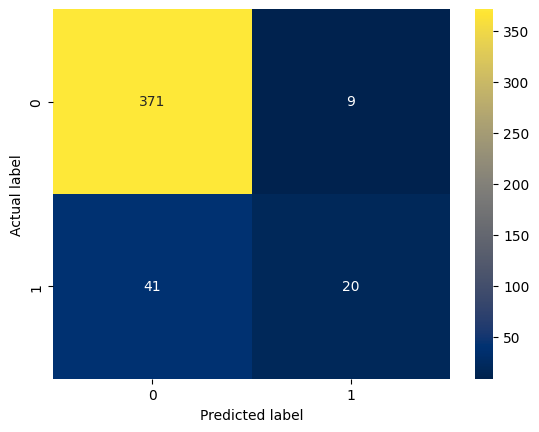

In [3]:
#create confusion matrix
#Modified from DataCamp (Navlani, 2024).
from sklearn import metrics
import numpy as np

confus_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confus_matrix), annot=True, cmap='cividis', fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [4]:
#accuracy, precision, recall
#DataCamp Assistance (Navlani, 2024)
from sklearn.metrics import classification_report

target_names = ['No Attrition', 'Attrition']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

No Attrition       0.90      0.98      0.94       380
   Attrition       0.69      0.33      0.44        61

    accuracy                           0.89       441
   macro avg       0.80      0.65      0.69       441
weighted avg       0.87      0.89      0.87       441



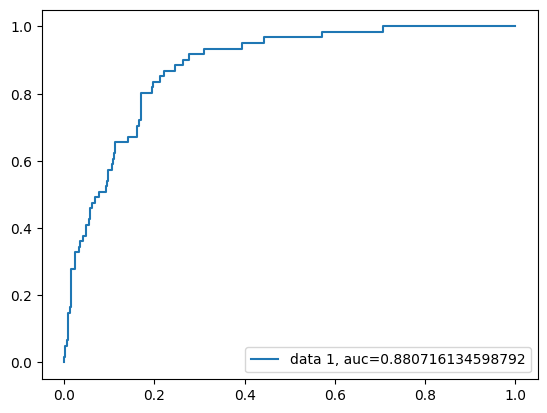

In [5]:
#ROC curve
#DataCamp Assistance (Navlani, 2024)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

y_pred_proba = log_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_encoded, y_pred_proba)
auc = metrics.roc_auc_score(y_test_encoded, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [6]:
#convert columns with int types to object for categorization analysis
merged_df = merged_df.astype({'Education': object,
                              'EnvironmentSatisfaction': object,
                              'JobInvolvement': object,
                              'JobLevel': object,
                              'JobSatisfaction': object, 
                              'PerformanceRating': object,
                              'RelationshipSatisfaction': object,
                              'StockOptionLevel': object,
                              'TrainingTimesLastYear': object,
                              'WorkLifeBalance': object})

--- Analyzing Age ---
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


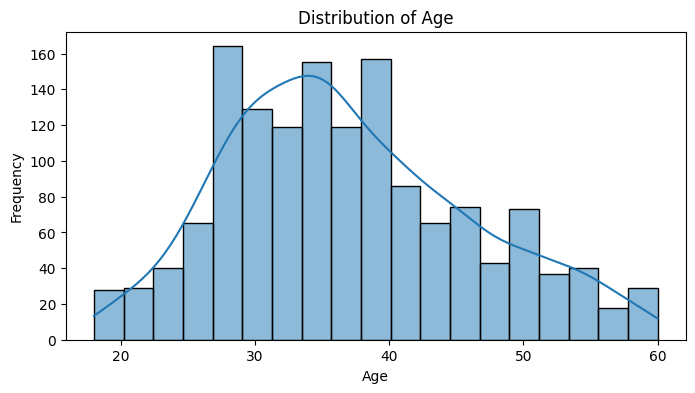

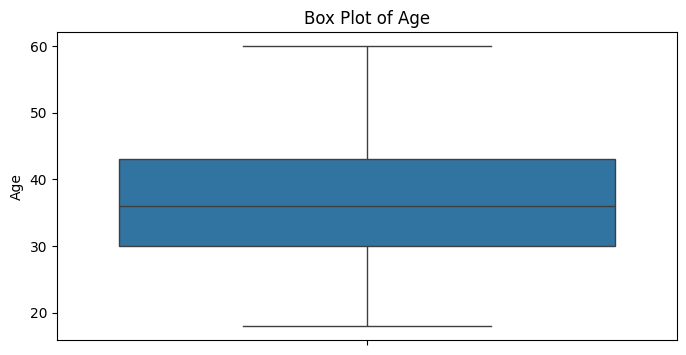

--- Analyzing DailyRate ---
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64


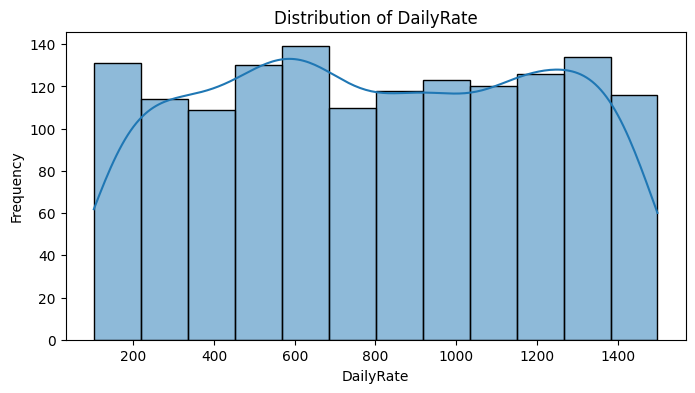

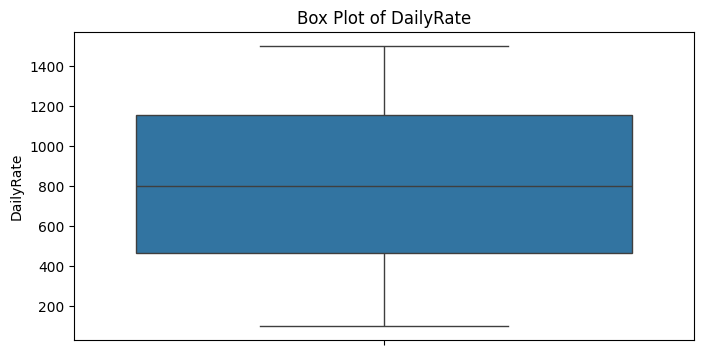

--- Analyzing DistanceFromHome ---
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


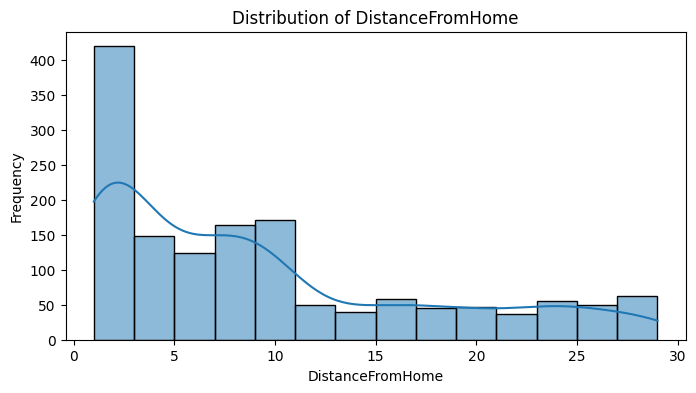

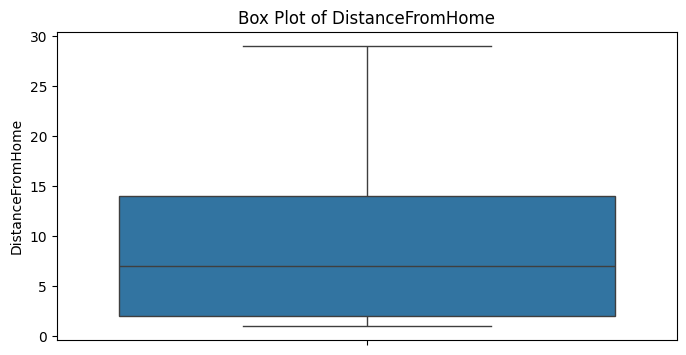

--- Analyzing EmployeeCount ---
count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64


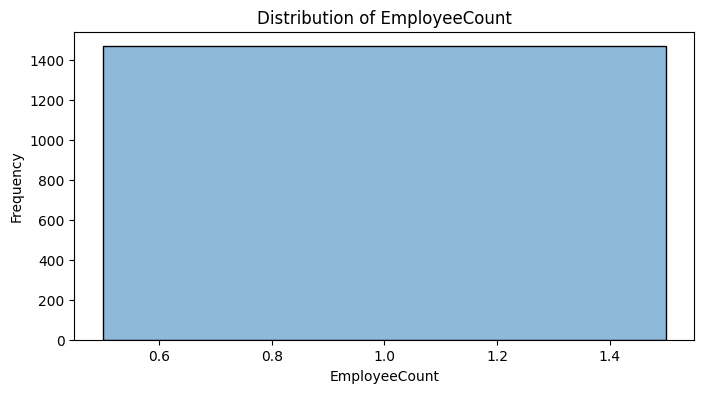

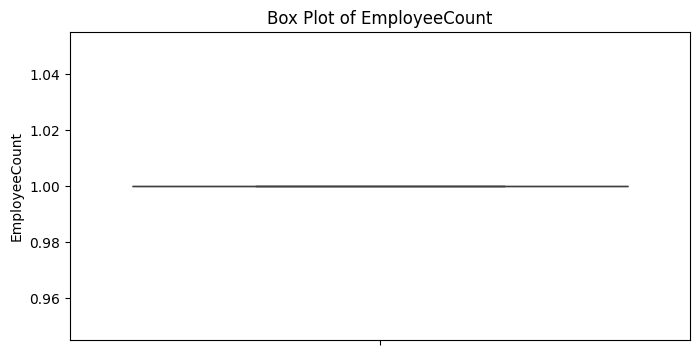

--- Analyzing EmployeeNumber ---
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64


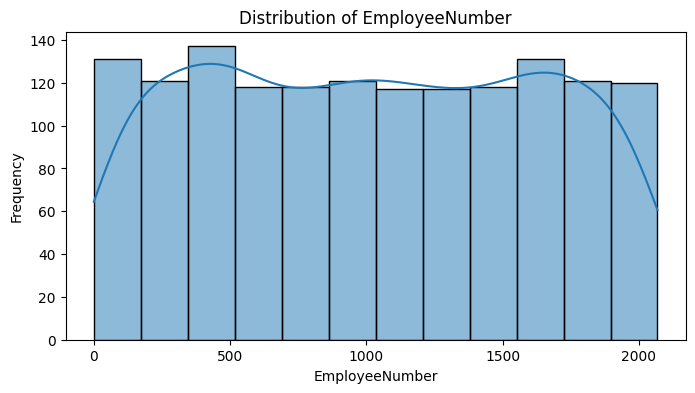

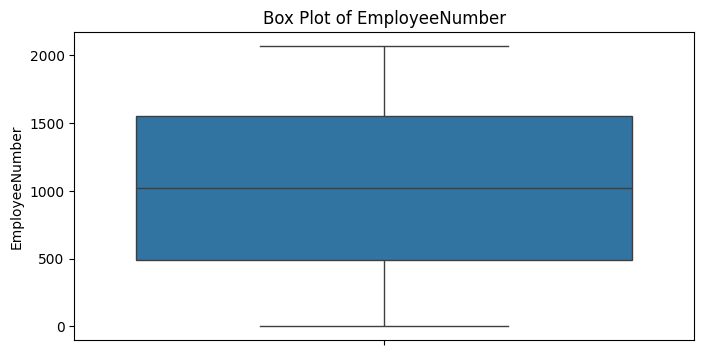

--- Analyzing HourlyRate ---
count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


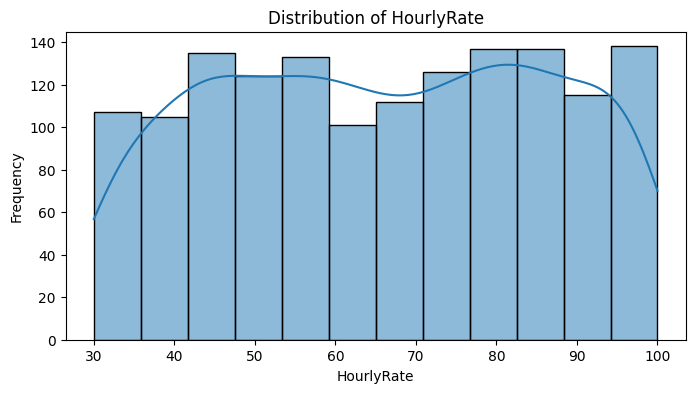

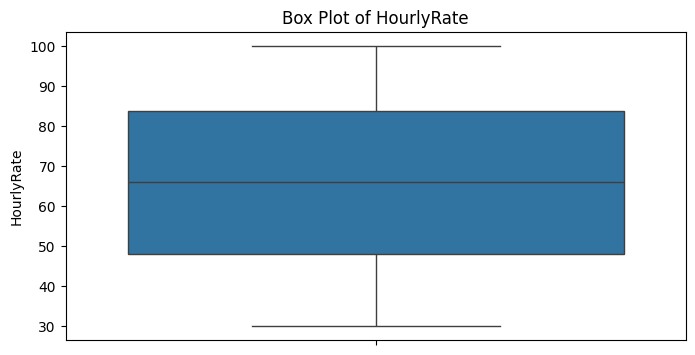

--- Analyzing MonthlyIncome ---
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


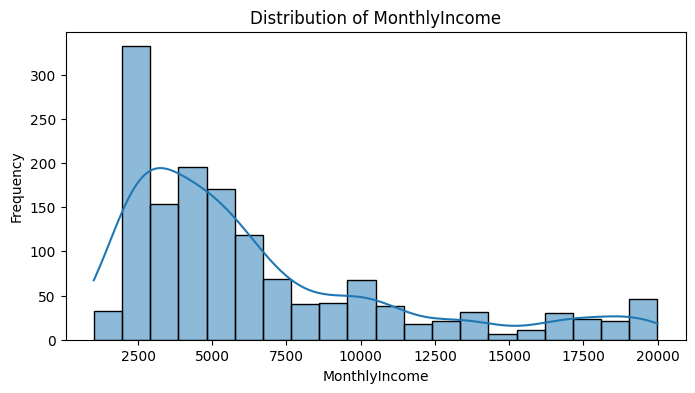

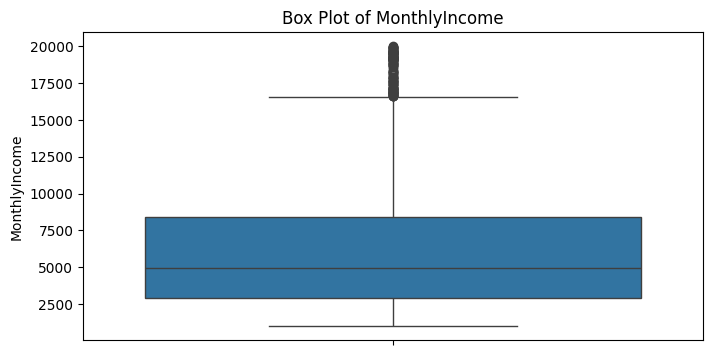

--- Analyzing MonthlyRate ---
count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


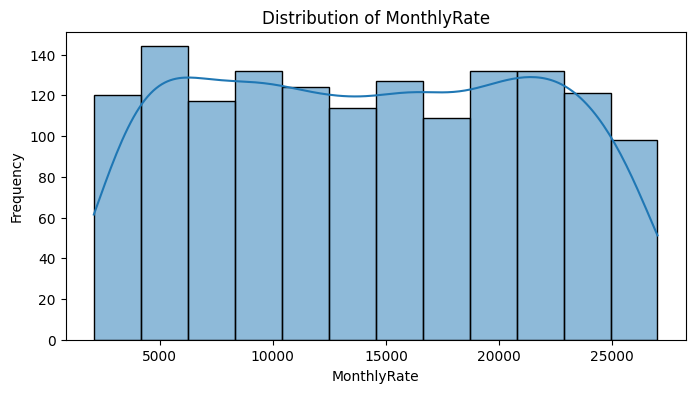

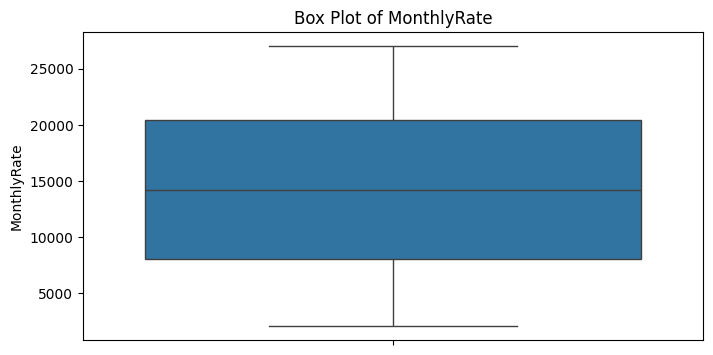

--- Analyzing NumCompaniesWorked ---
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64


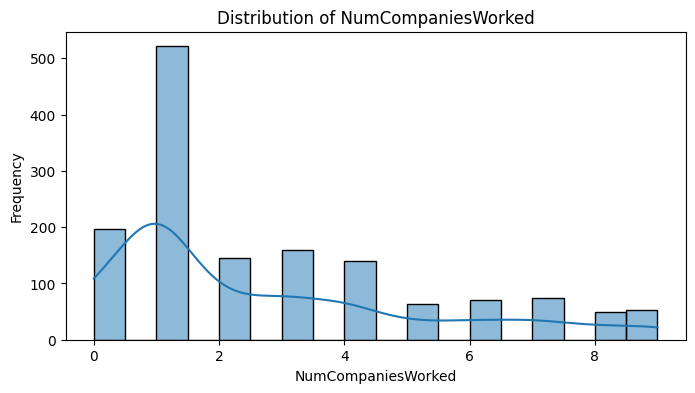

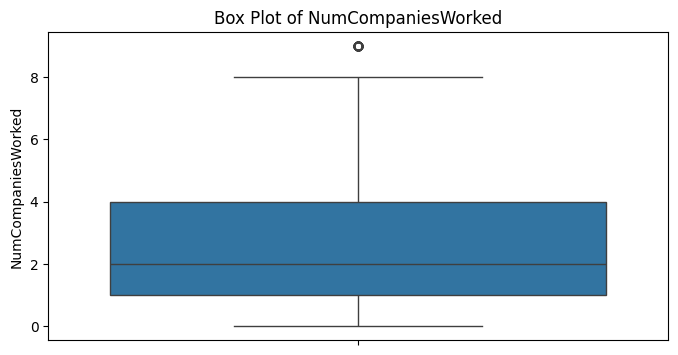

--- Analyzing PercentSalaryHike ---
count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


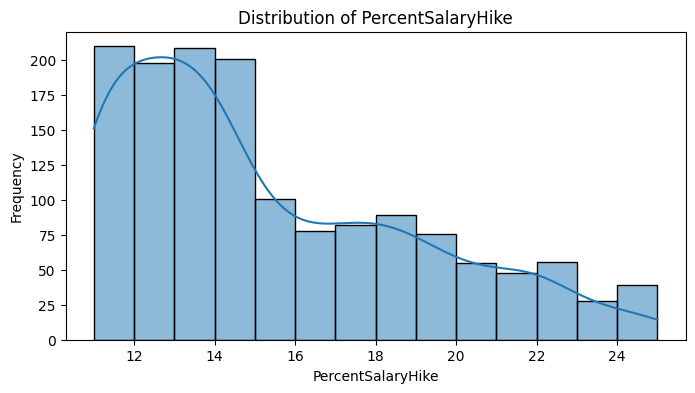

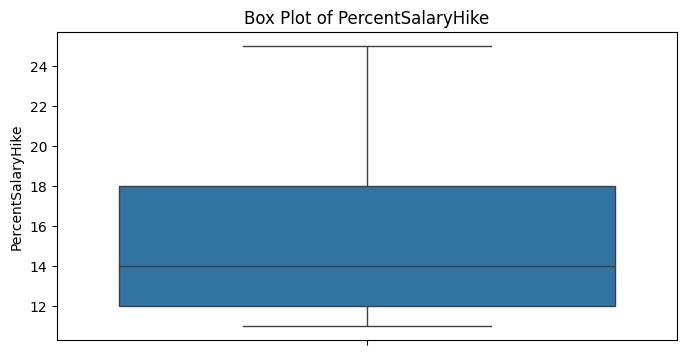

--- Analyzing StandardHours ---
count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64


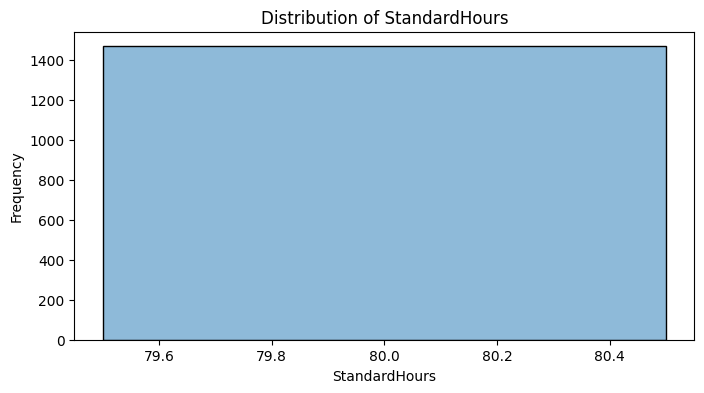

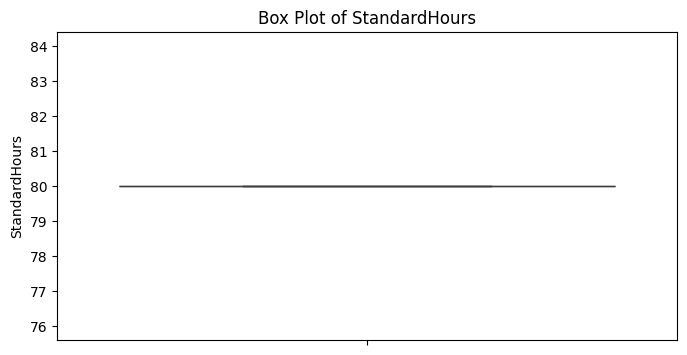

--- Analyzing TotalWorkingYears ---
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


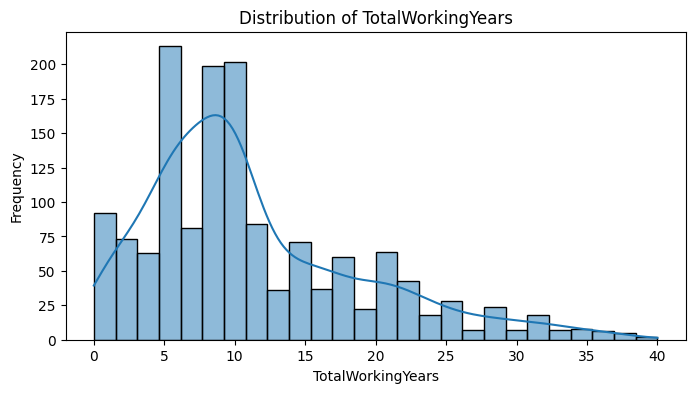

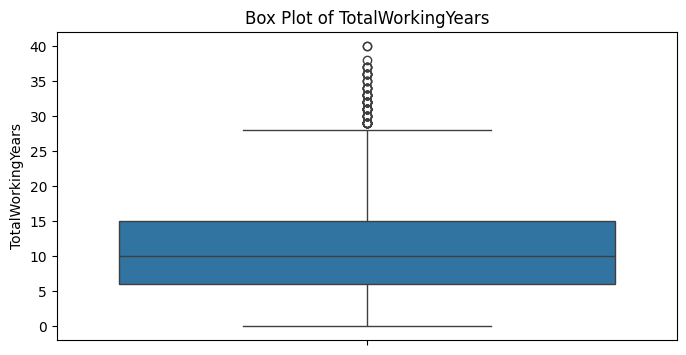

--- Analyzing YearsAtCompany ---
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


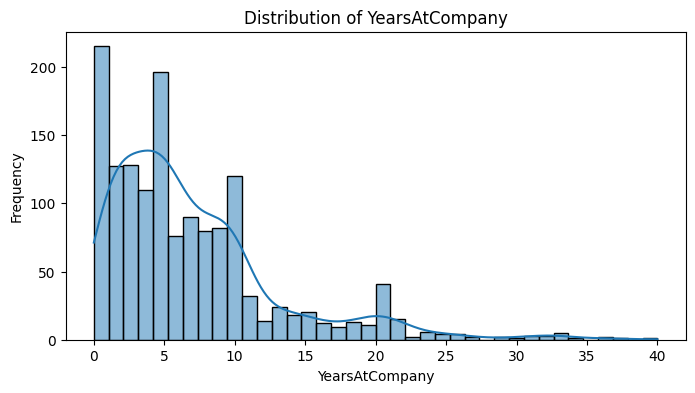

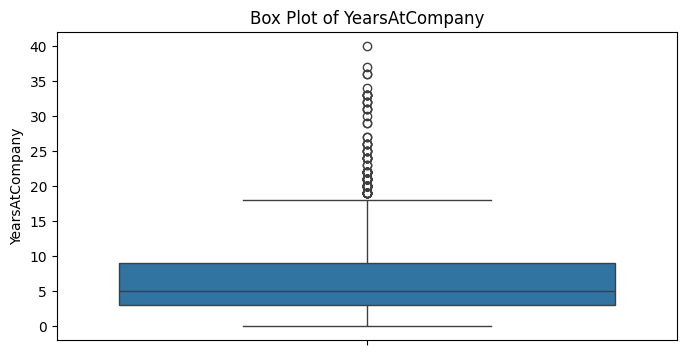

--- Analyzing YearsInCurrentRole ---
count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64


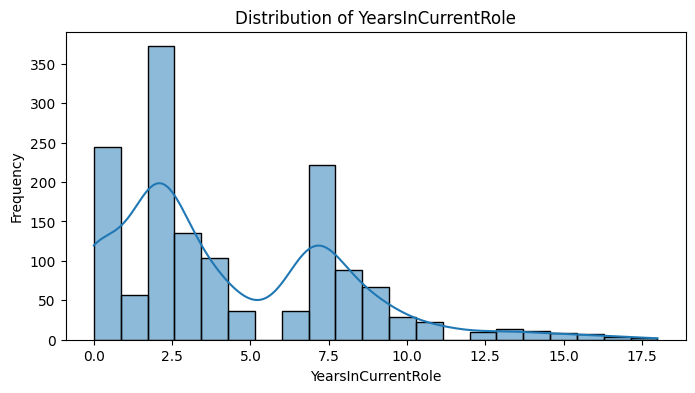

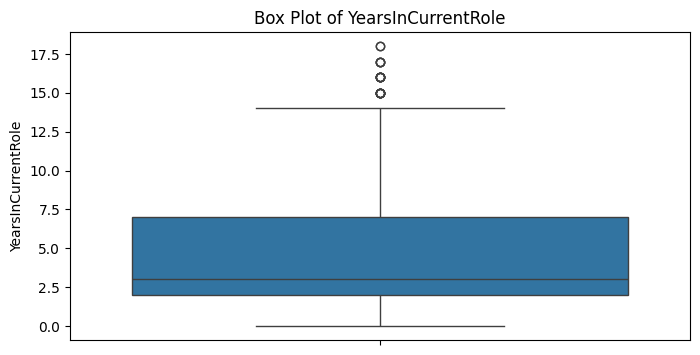

--- Analyzing YearsSinceLastPromotion ---
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64


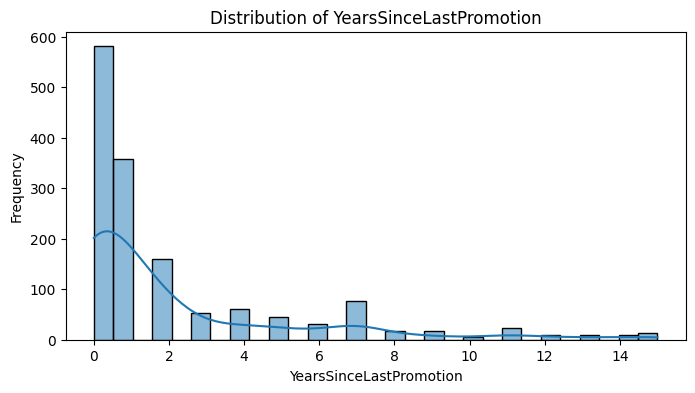

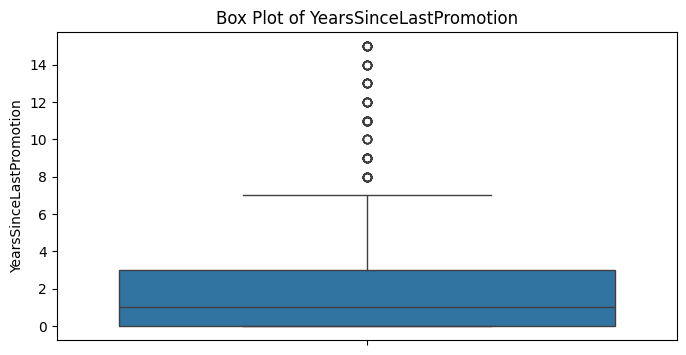

--- Analyzing YearsWithCurrManager ---
count    1470.000000
mean        3.666667
std         3.659863
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64


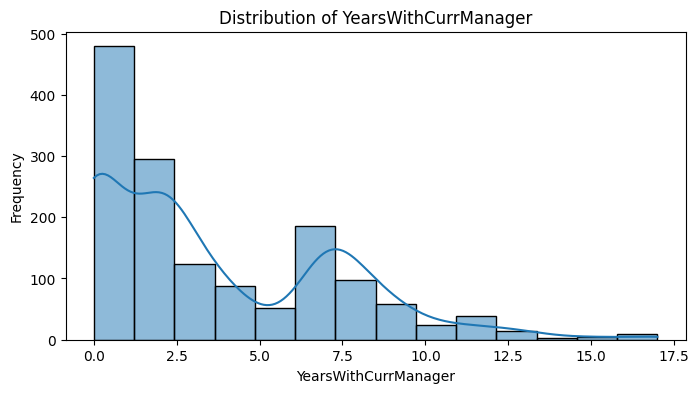

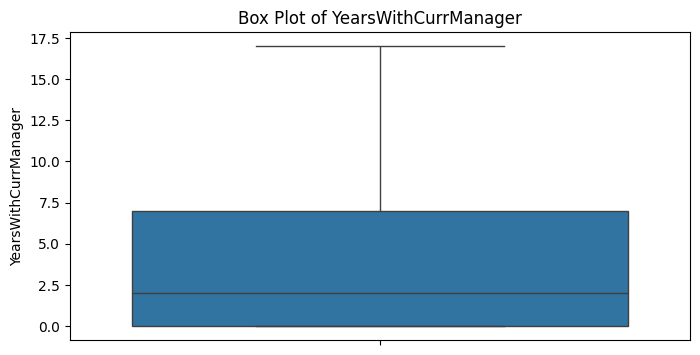

In [7]:
#univariate analysis for numerical columns
numerical_cols = merged_df.select_dtypes(include=['int64'])

for col in numerical_cols:
    print(f"--- Analyzing {col} ---")

    #descriptive statistics
    print(merged_df[col].describe())

    #histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    #boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=merged_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

--- Analyzing Attrition ---
Attrition
No     1233
Yes     237
Name: count, dtype: int64


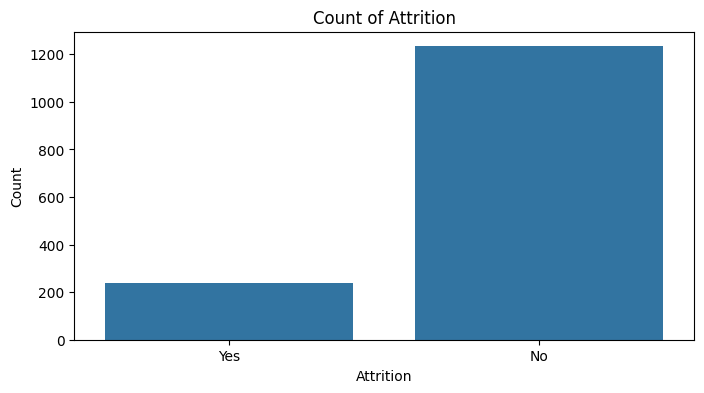

--- Analyzing BusinessTravel ---
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


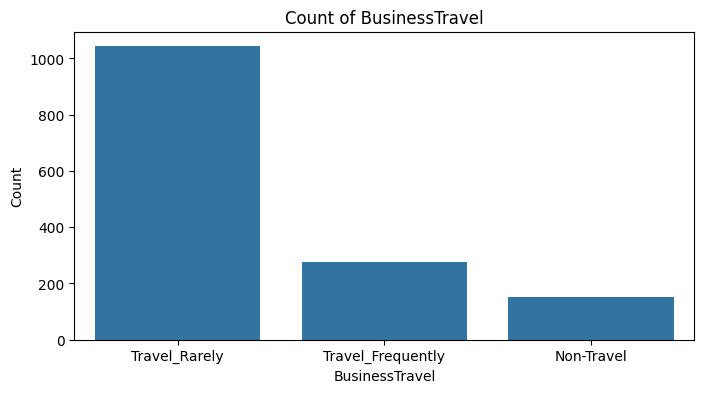

--- Analyzing Department ---
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


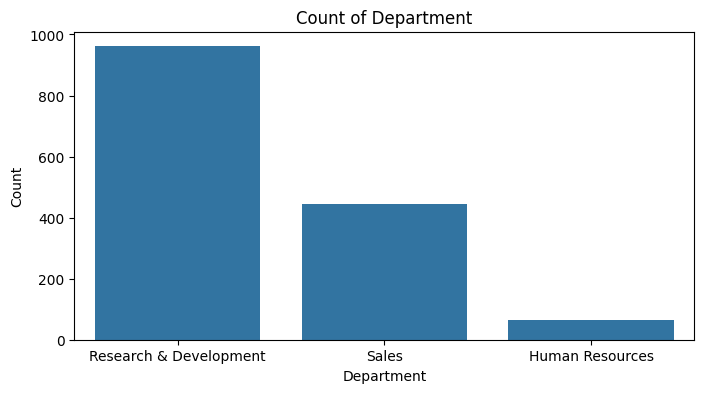

--- Analyzing Education ---
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64


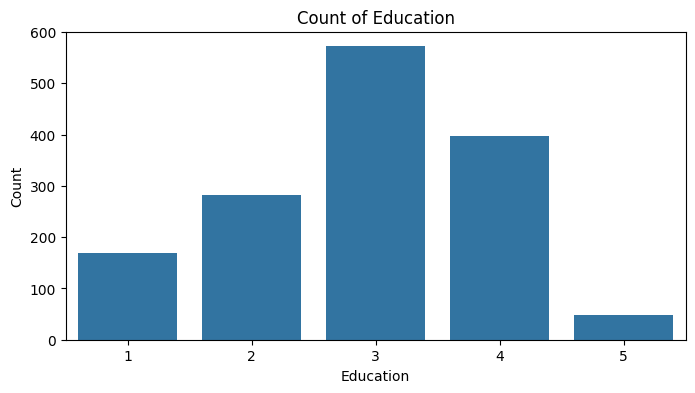

--- Analyzing EducationField ---
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


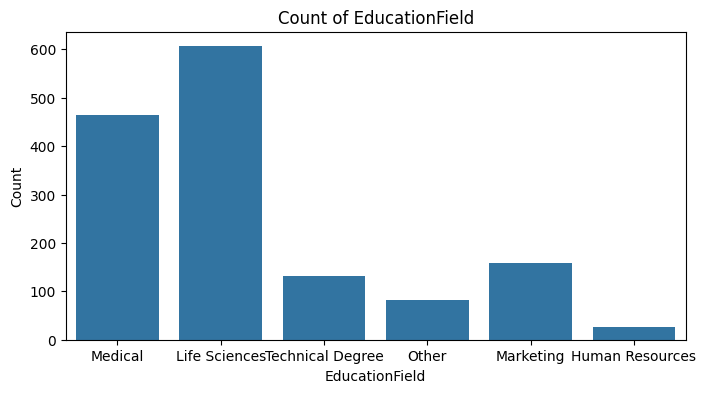

--- Analyzing EnvironmentSatisfaction ---
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


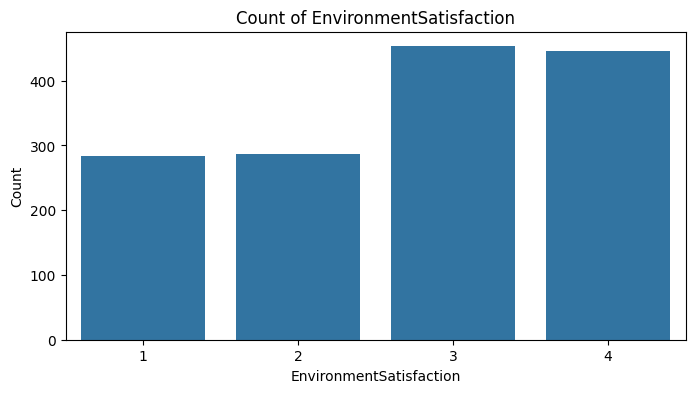

--- Analyzing Gender ---
Gender
Male      882
Female    588
Name: count, dtype: int64


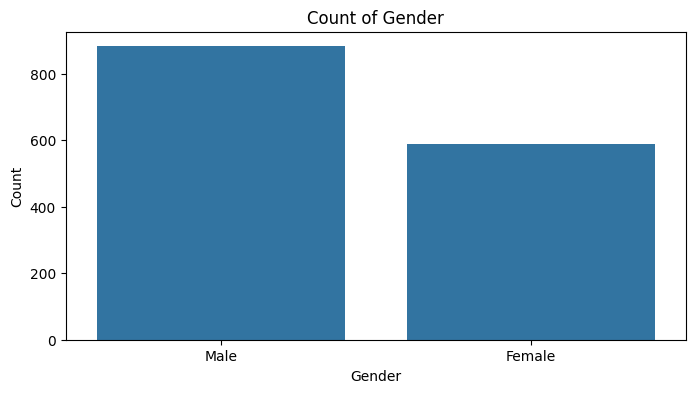

--- Analyzing JobInvolvement ---
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64


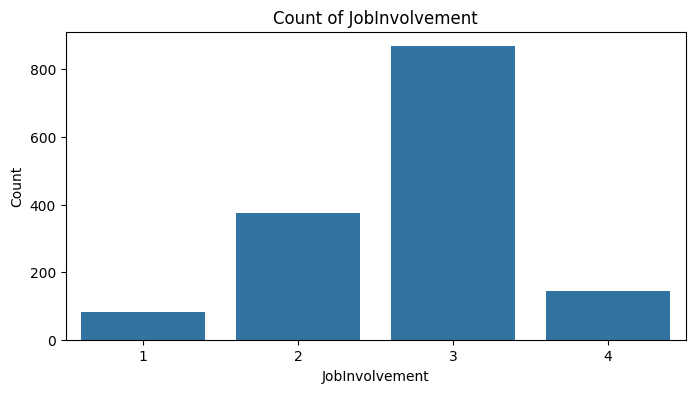

--- Analyzing JobLevel ---
JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64


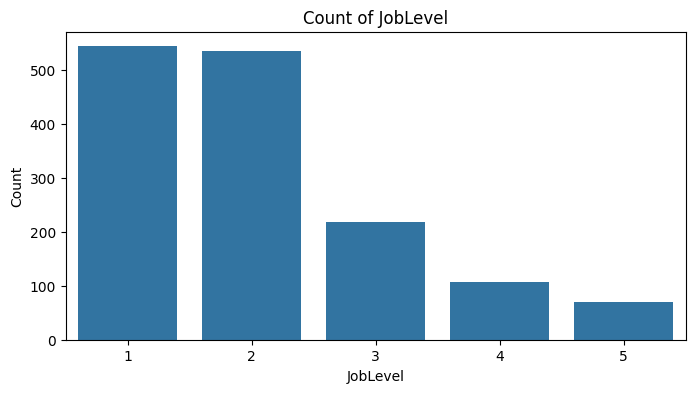

--- Analyzing JobRole ---
JobRole
Laboratory Technician        316
Sales Executive              273
Research Scientist           251
Sales Representative         136
Manufacturing Director       135
Healthcare Representative    131
Manager                       98
Research Director             78
Human Resources               52
Name: count, dtype: int64


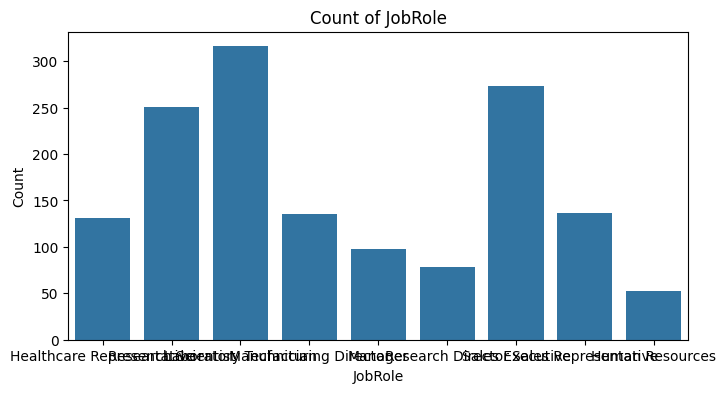

--- Analyzing JobSatisfaction ---
JobSatisfaction
4    414
1    398
3    378
2    280
Name: count, dtype: int64


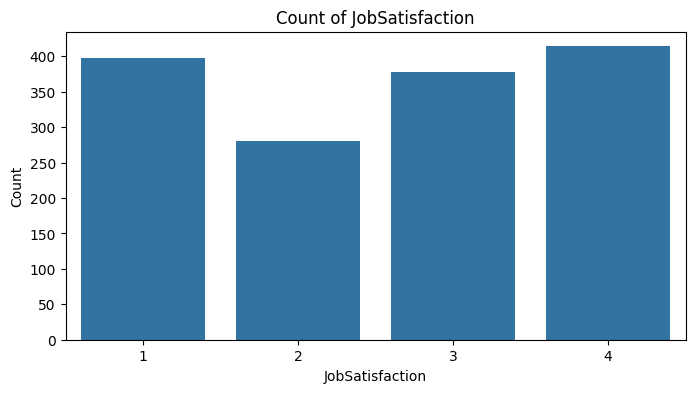

--- Analyzing MaritalStatus ---
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


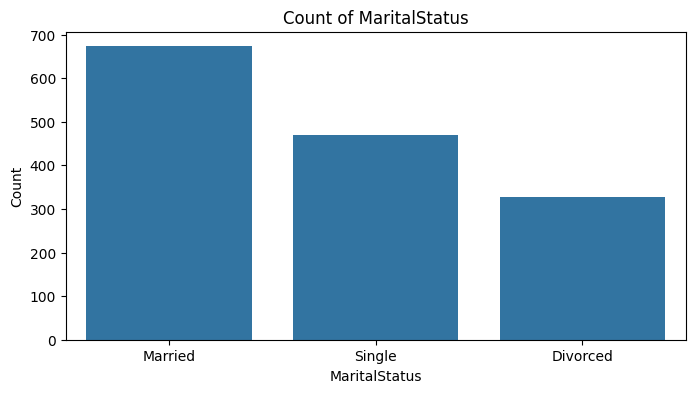

--- Analyzing Over18 ---
Over18
Y    1470
Name: count, dtype: int64


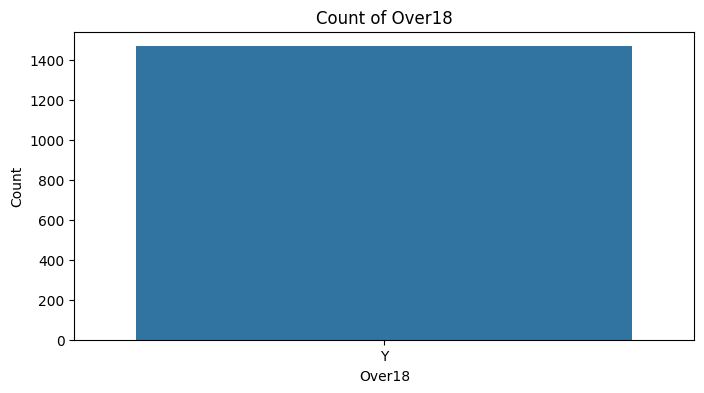

--- Analyzing OverTime ---
OverTime
No     1054
Yes     416
Name: count, dtype: int64


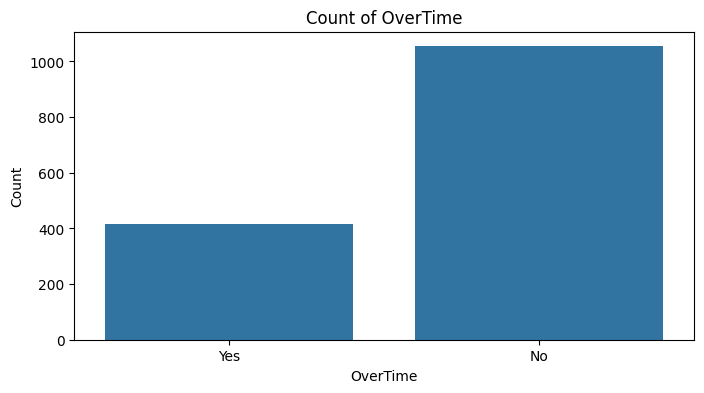

--- Analyzing PerformanceRating ---
PerformanceRating
3    1044
1     231
4     189
2       6
Name: count, dtype: int64


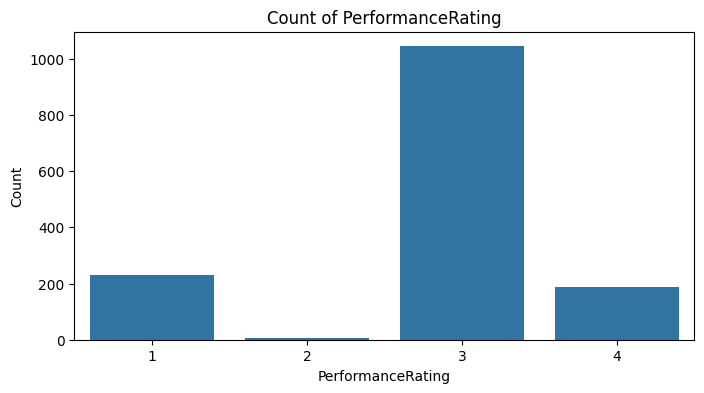

--- Analyzing RelationshipSatisfaction ---
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64


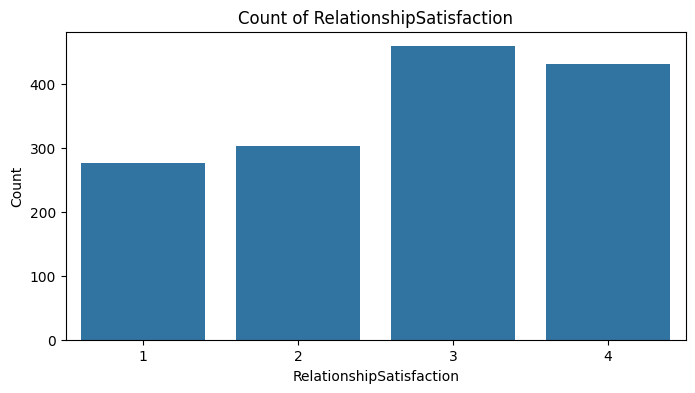

--- Analyzing StockOptionLevel ---
StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64


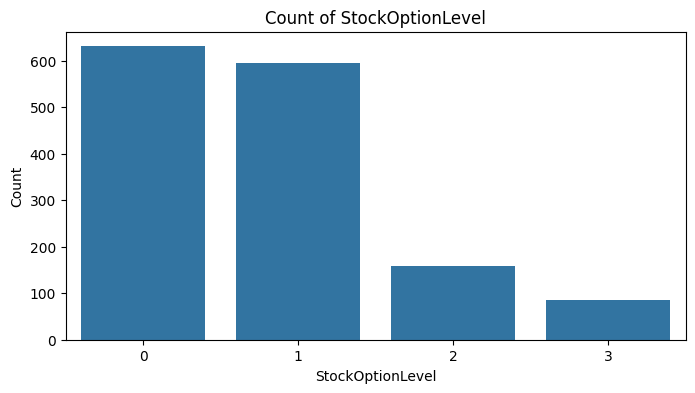

--- Analyzing TrainingTimesLastYear ---
TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64


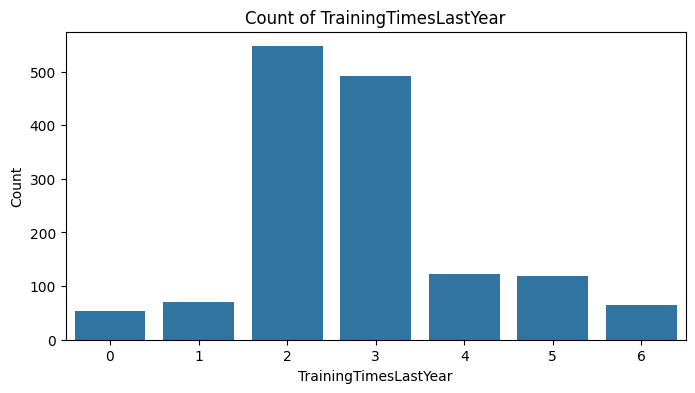

--- Analyzing WorkLifeBalance ---
WorkLifeBalance
3    766
2    294
1    284
4    126
Name: count, dtype: int64


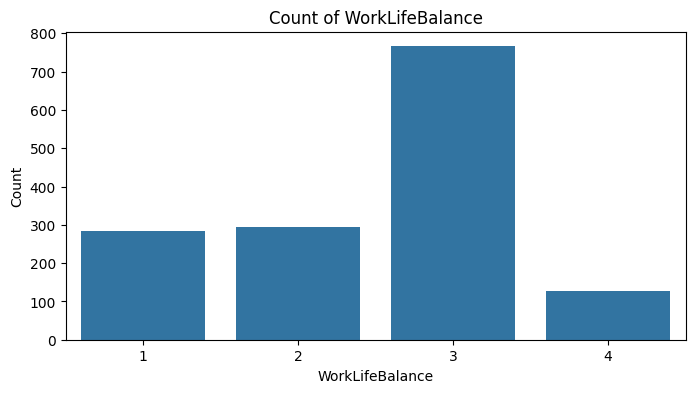

In [8]:
#univariate analysis for categorical columns
categorical_cols = merged_df.select_dtypes(include=['object'])

for col in categorical_cols:
    print(f"--- Analyzing {col} ---")

    #value counts
    print(merged_df[col].value_counts())

    #count plot
    plt.figure(figsize=(8, 4))
    sns.countplot(x=merged_df[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Analyzing Numerical Variables against Target:
ANOVA for Age: F-statistic = 38.18, P-value = 0.000


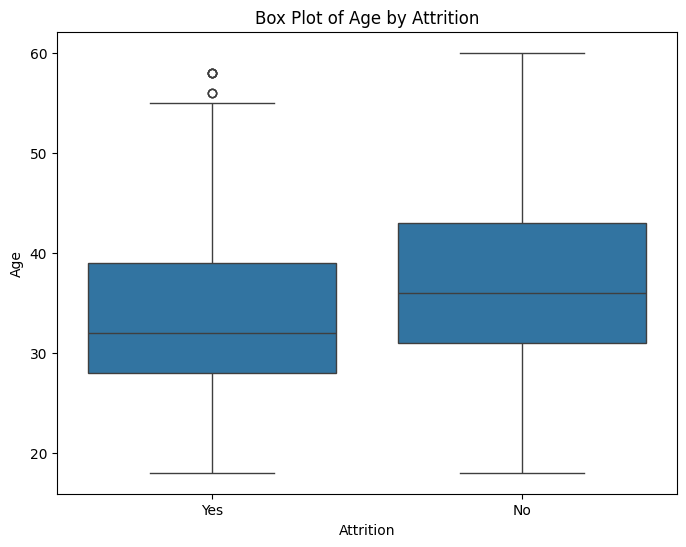

ANOVA for DailyRate: F-statistic = 4.73, P-value = 0.030


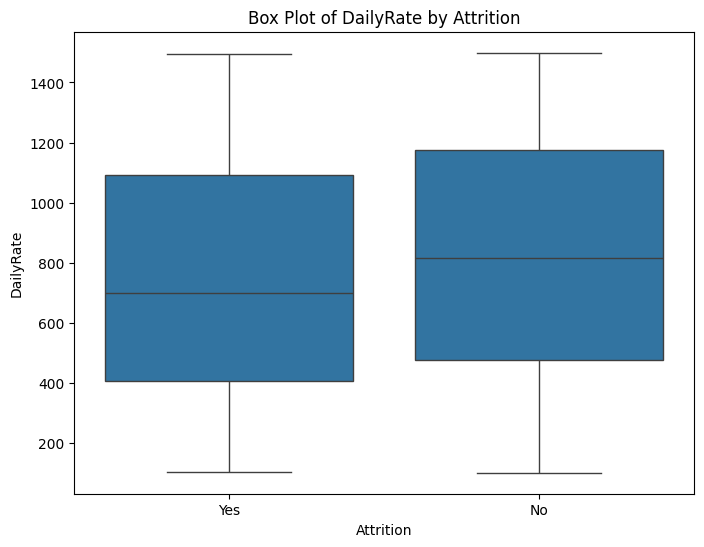

ANOVA for DistanceFromHome: F-statistic = 8.97, P-value = 0.003


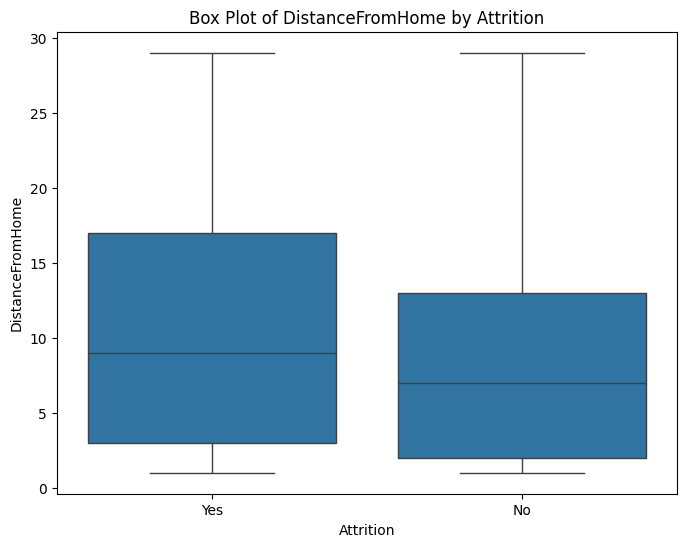

ANOVA for EmployeeCount: F-statistic = nan, P-value = nan


C:\Users\Hayden\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


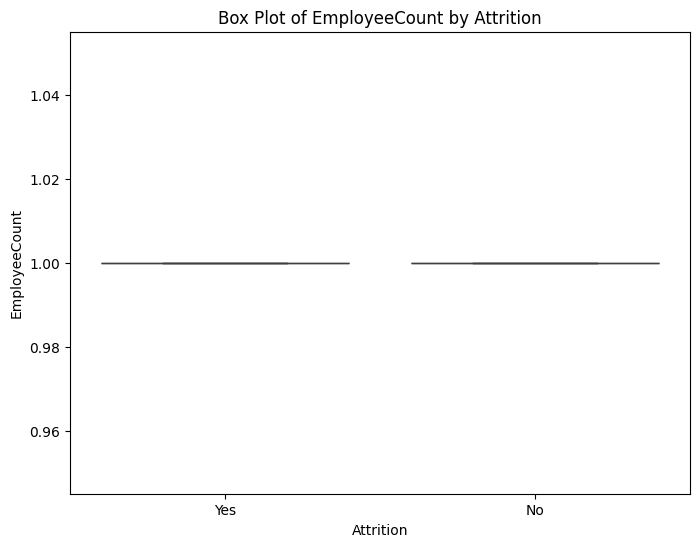

ANOVA for EmployeeNumber: F-statistic = 0.16, P-value = 0.685


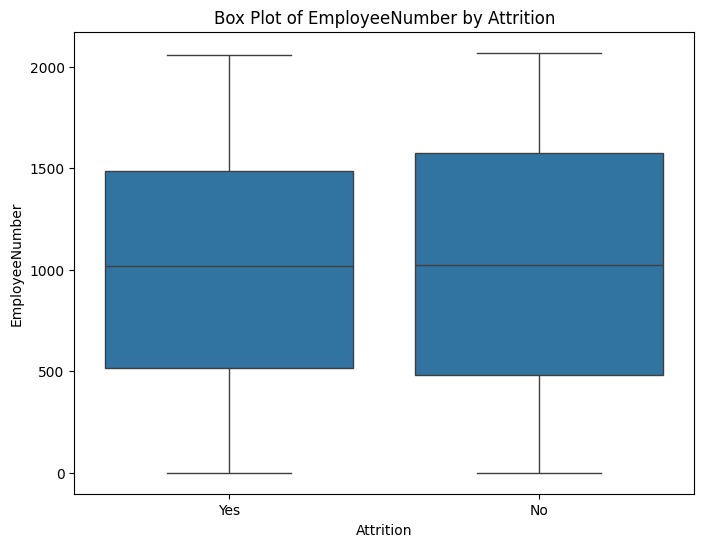

ANOVA for HourlyRate: F-statistic = 0.07, P-value = 0.793


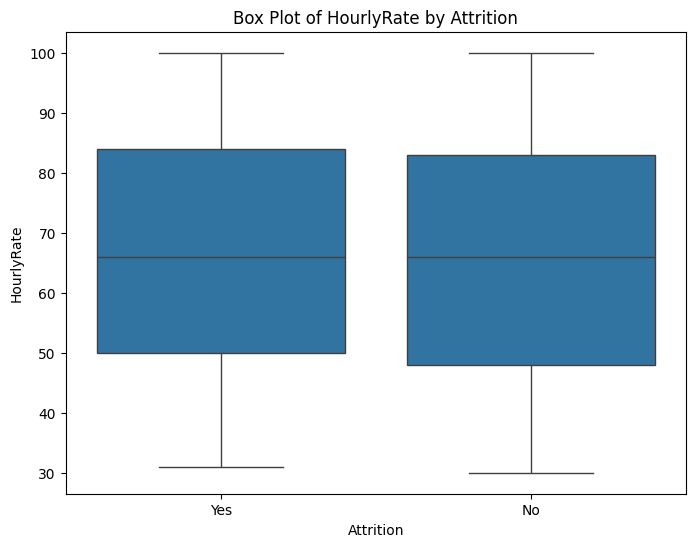

ANOVA for MonthlyIncome: F-statistic = 38.49, P-value = 0.000


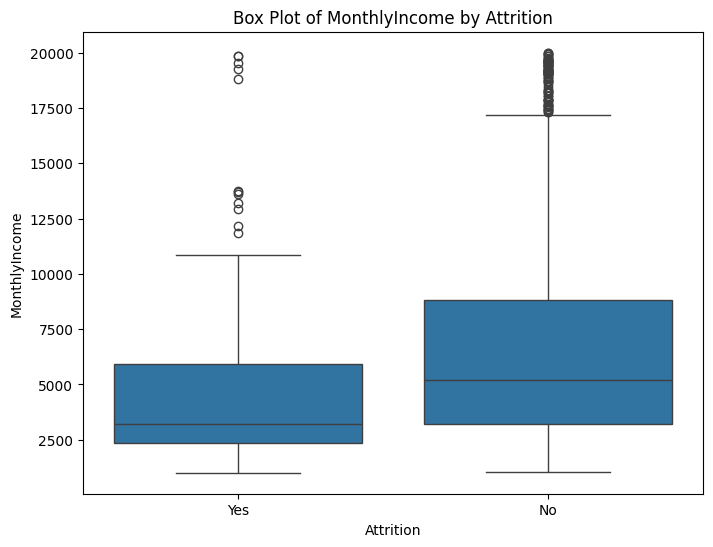

ANOVA for MonthlyRate: F-statistic = 0.34, P-value = 0.561


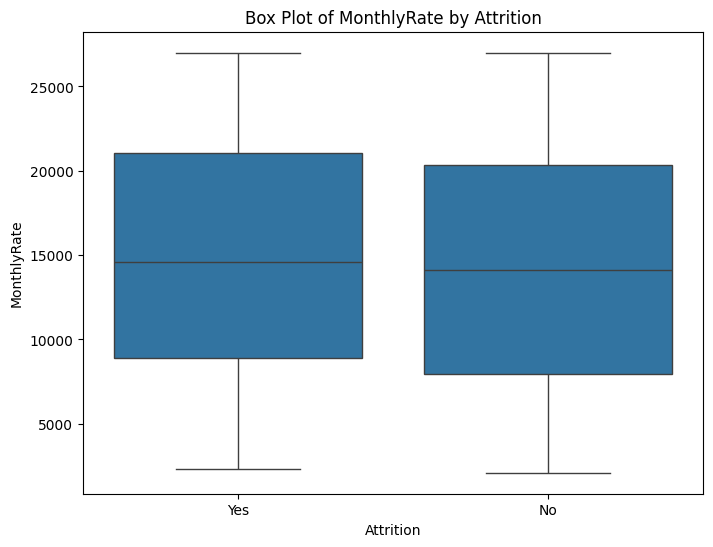

ANOVA for NumCompaniesWorked: F-statistic = 2.78, P-value = 0.096


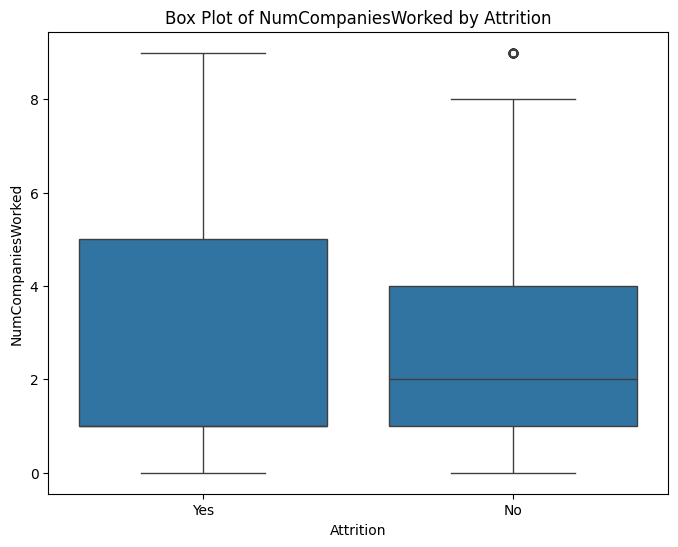

ANOVA for PercentSalaryHike: F-statistic = 0.27, P-value = 0.606


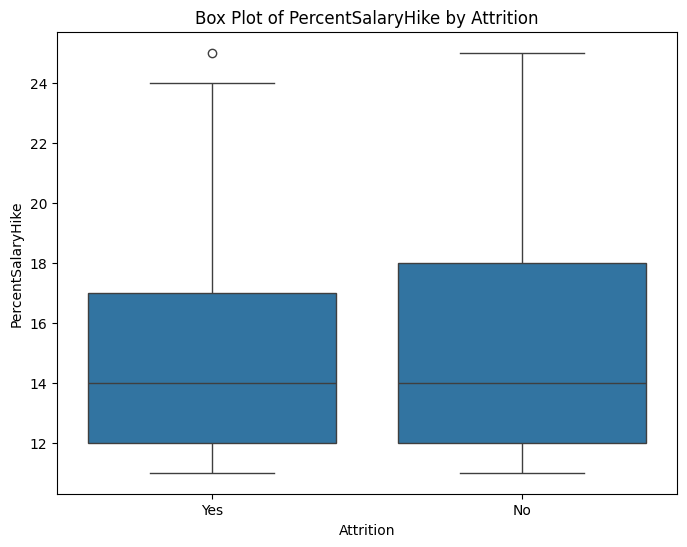

ANOVA for StandardHours: F-statistic = nan, P-value = nan


C:\Users\Hayden\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


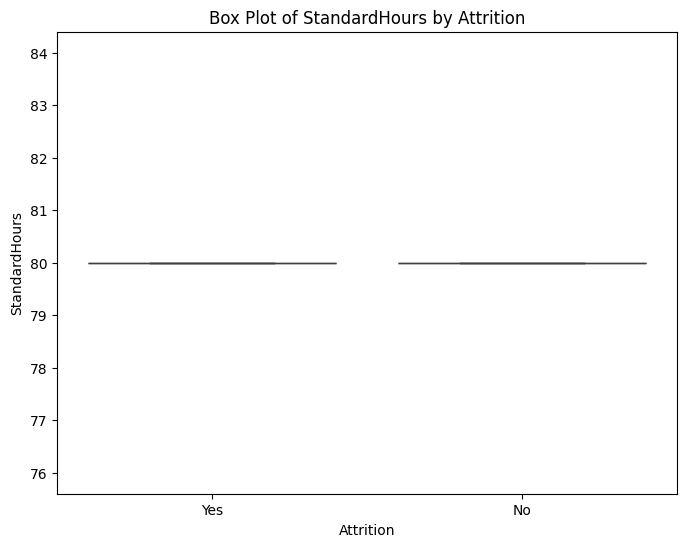

ANOVA for TotalWorkingYears: F-statistic = 44.25, P-value = 0.000


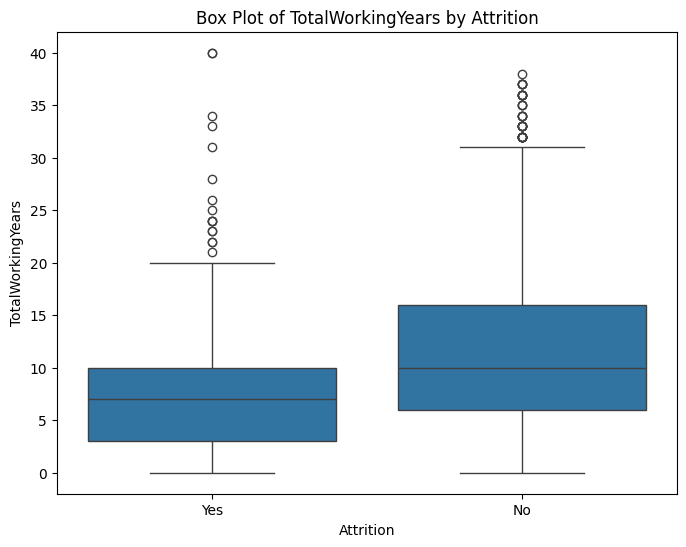

ANOVA for YearsAtCompany: F-statistic = 27.00, P-value = 0.000


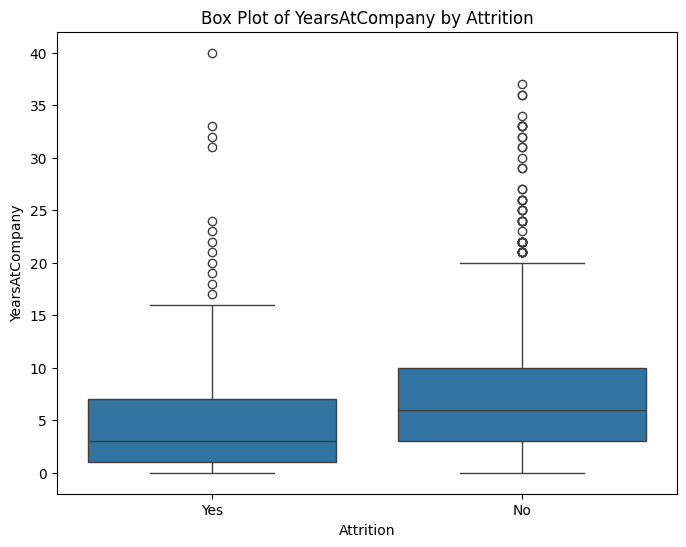

ANOVA for YearsInCurrentRole: F-statistic = 38.84, P-value = 0.000


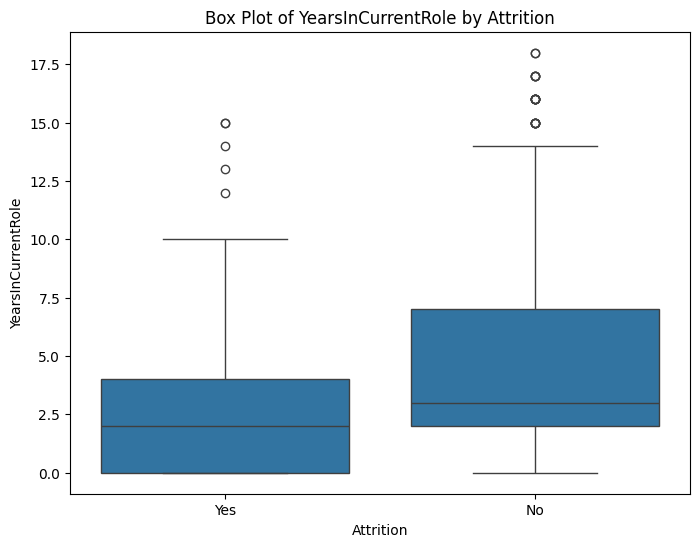

ANOVA for YearsSinceLastPromotion: F-statistic = 1.60, P-value = 0.206


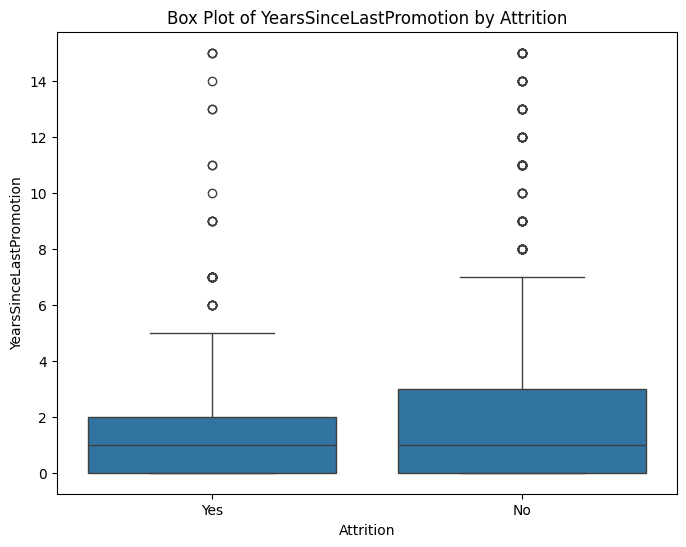

ANOVA for YearsWithCurrManager: F-statistic = 346.24, P-value = 0.000


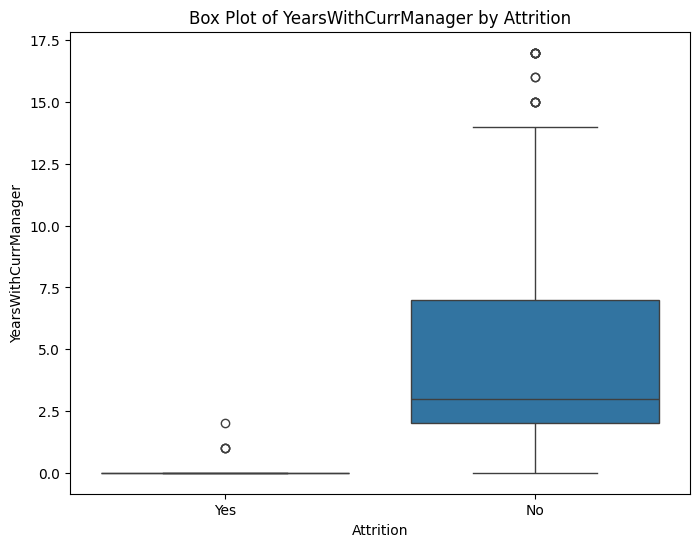


Analyzing Categorical Variables against Attrition:
Chi-squared test for BusinessTravel: Chi2 = 24.18, P-value = 0.000


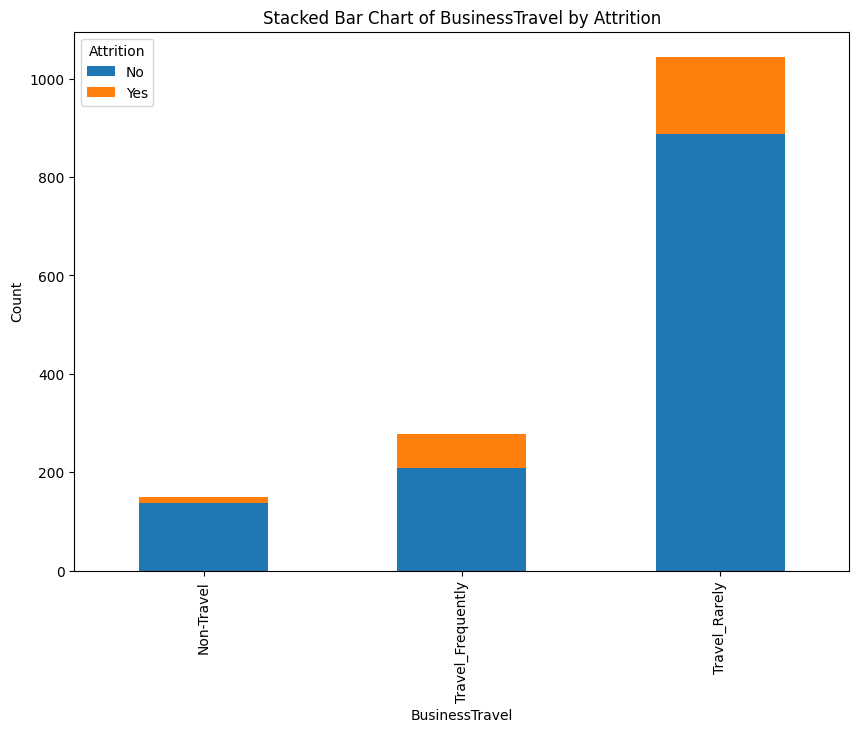

Chi-squared test for Department: Chi2 = 10.80, P-value = 0.005


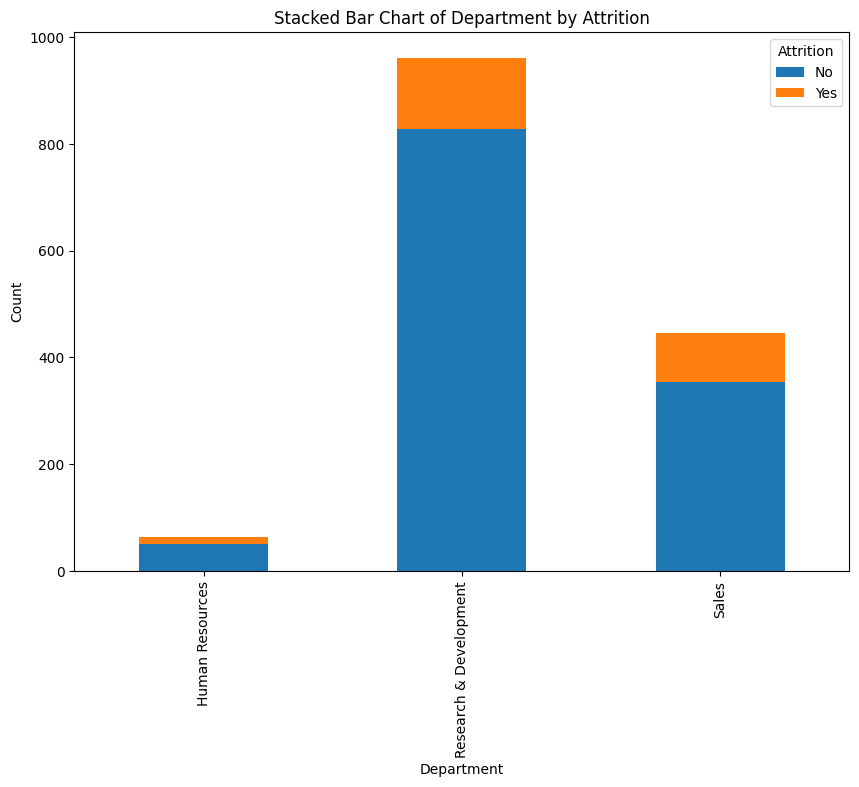

Chi-squared test for Education: Chi2 = 3.07, P-value = 0.546


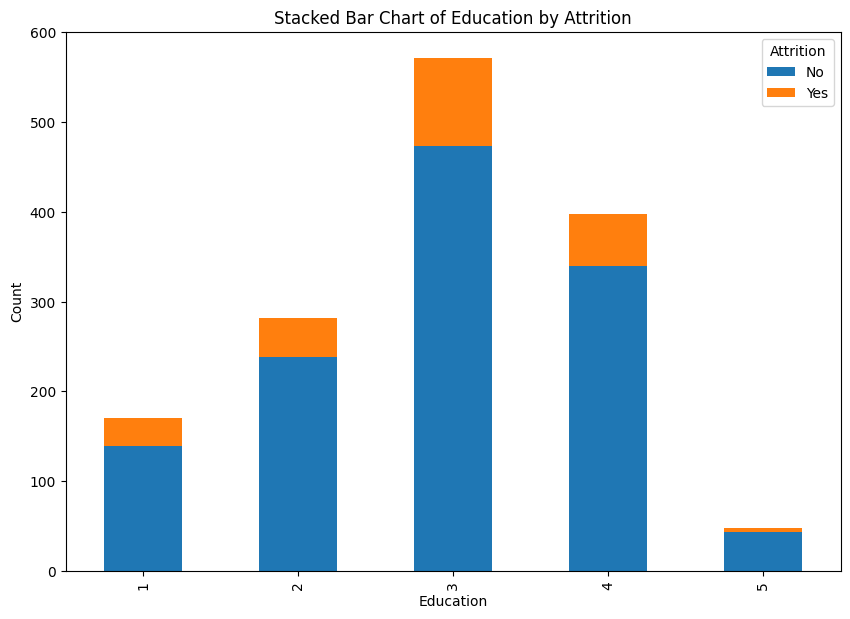

Chi-squared test for EducationField: Chi2 = 16.02, P-value = 0.007


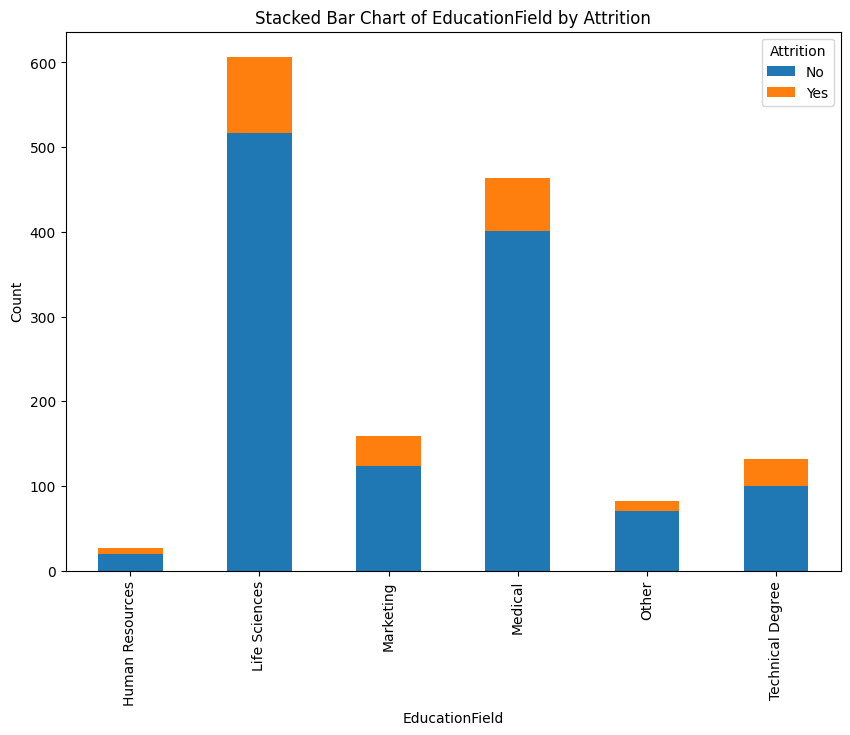

Chi-squared test for EnvironmentSatisfaction: Chi2 = 22.50, P-value = 0.000


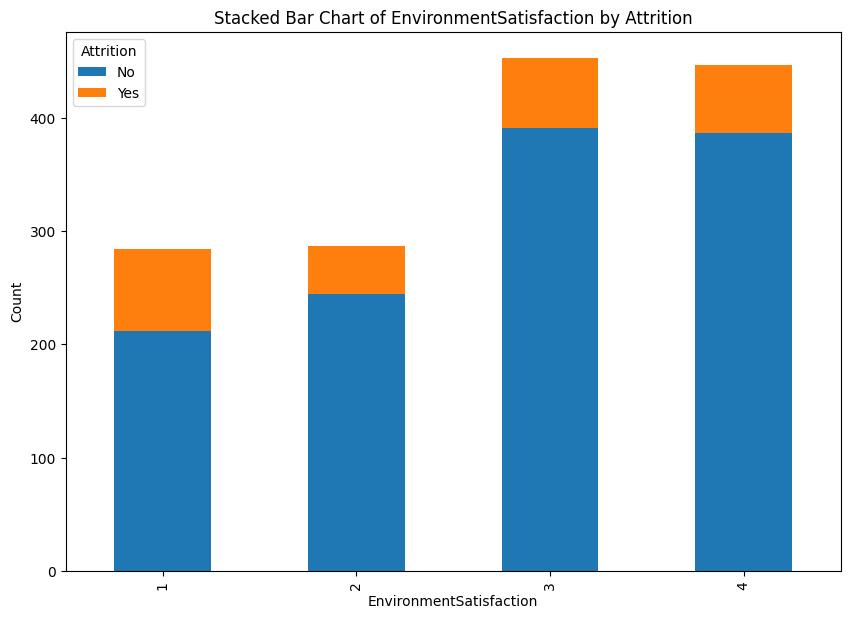

Chi-squared test for Gender: Chi2 = 1.12, P-value = 0.291


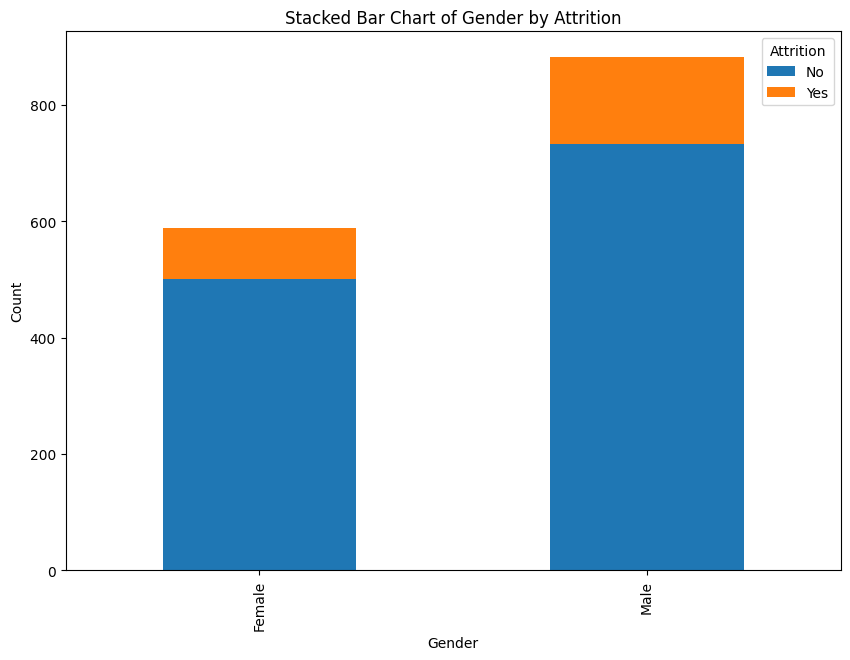

Chi-squared test for JobInvolvement: Chi2 = 28.49, P-value = 0.000


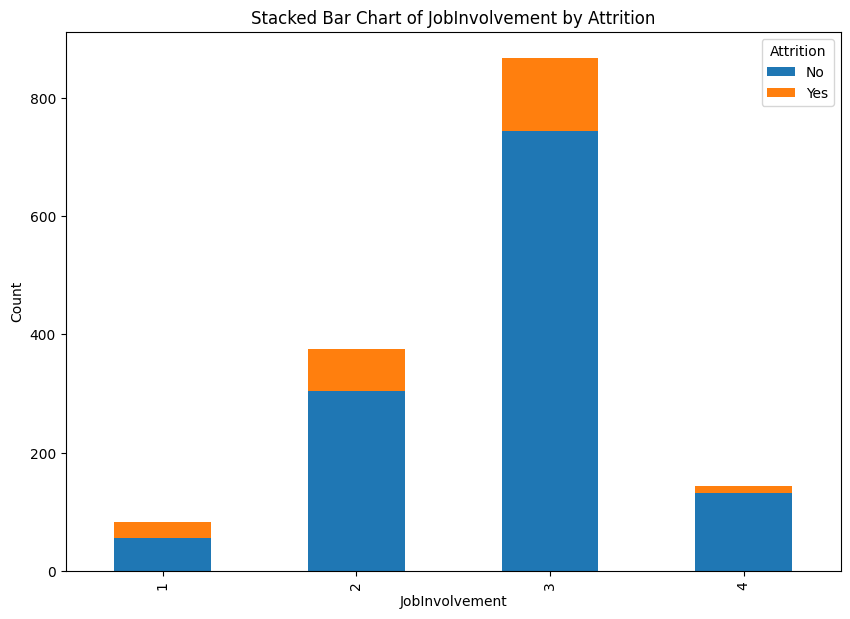

Chi-squared test for JobLevel: Chi2 = 72.53, P-value = 0.000


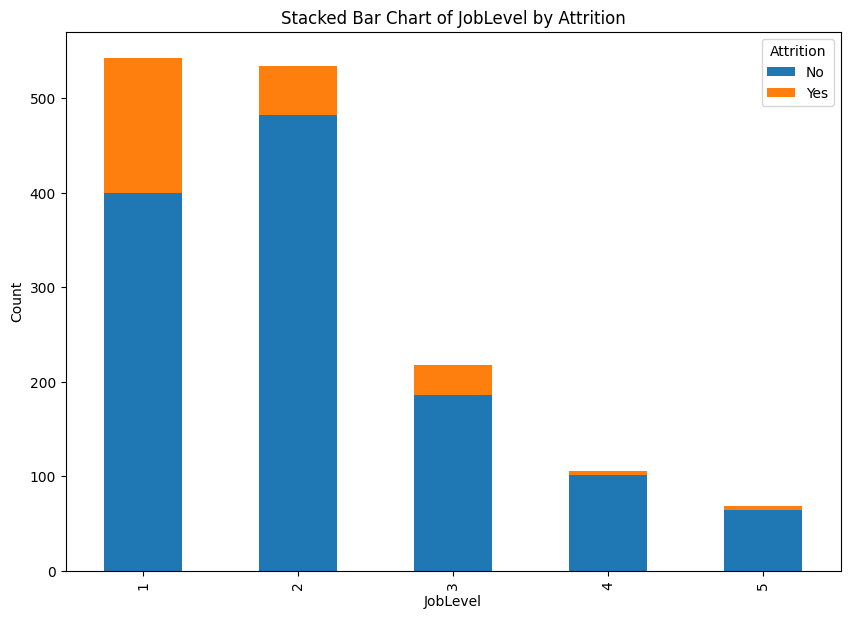

Chi-squared test for JobRole: Chi2 = 477.59, P-value = 0.000


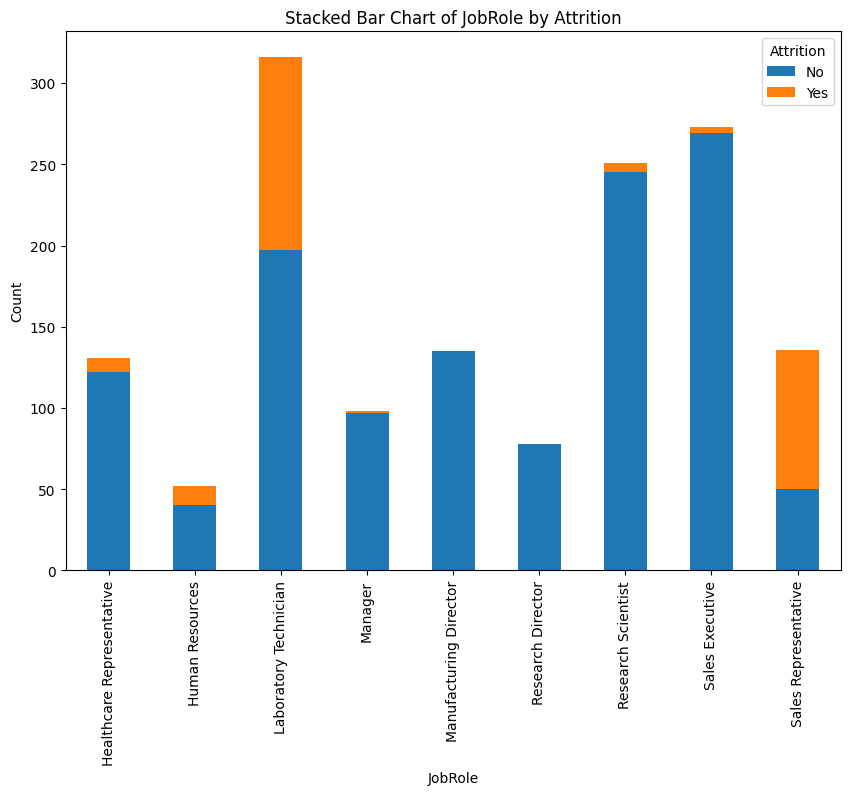

Chi-squared test for JobSatisfaction: Chi2 = 344.79, P-value = 0.000


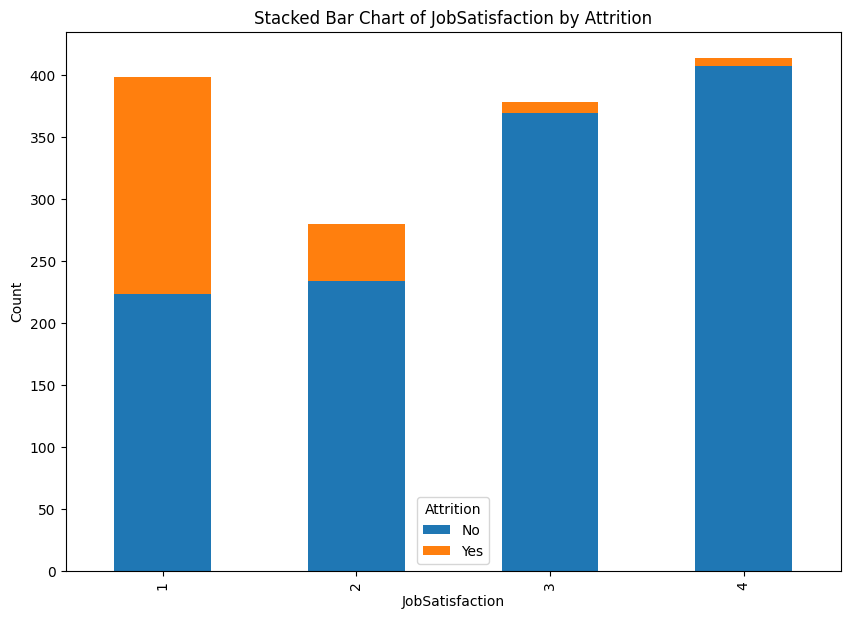

Chi-squared test for MaritalStatus: Chi2 = 46.16, P-value = 0.000


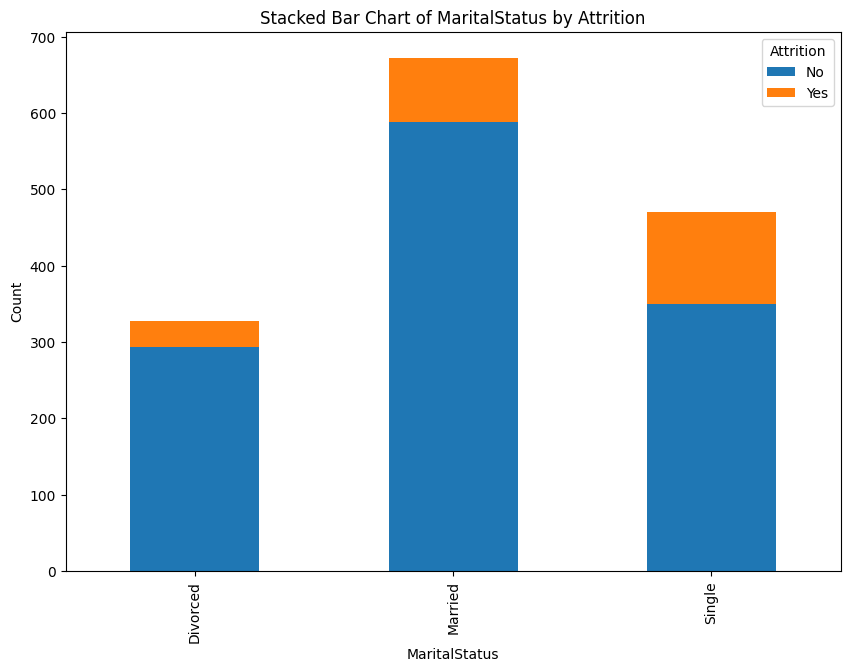

Chi-squared test for Over18: Chi2 = 0.00, P-value = 1.000


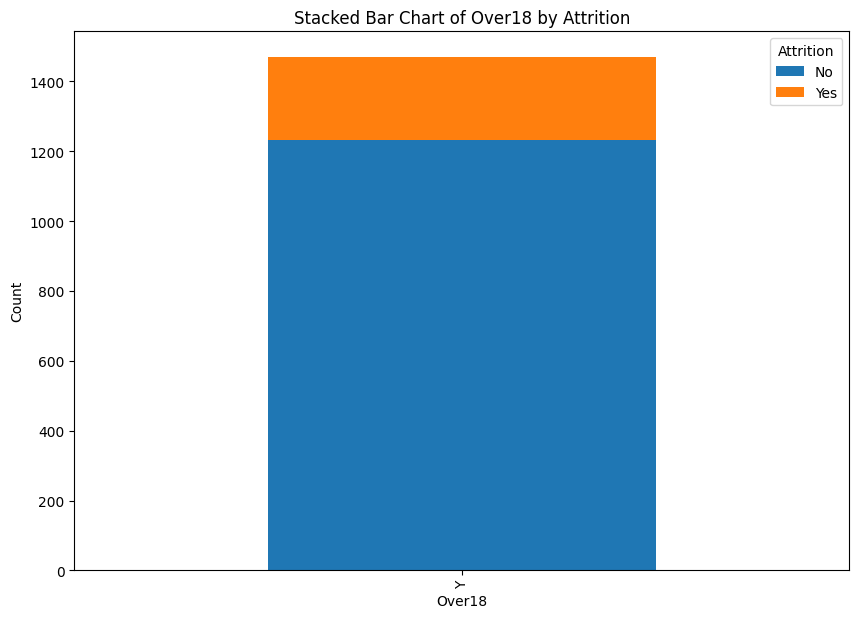

Chi-squared test for OverTime: Chi2 = 87.56, P-value = 0.000


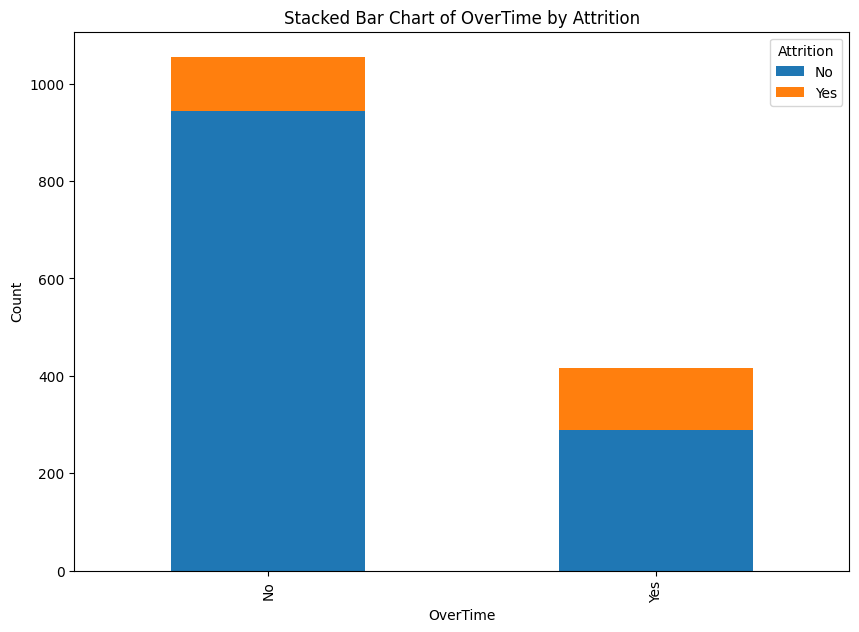

Chi-squared test for PerformanceRating: Chi2 = 1470.00, P-value = 0.000


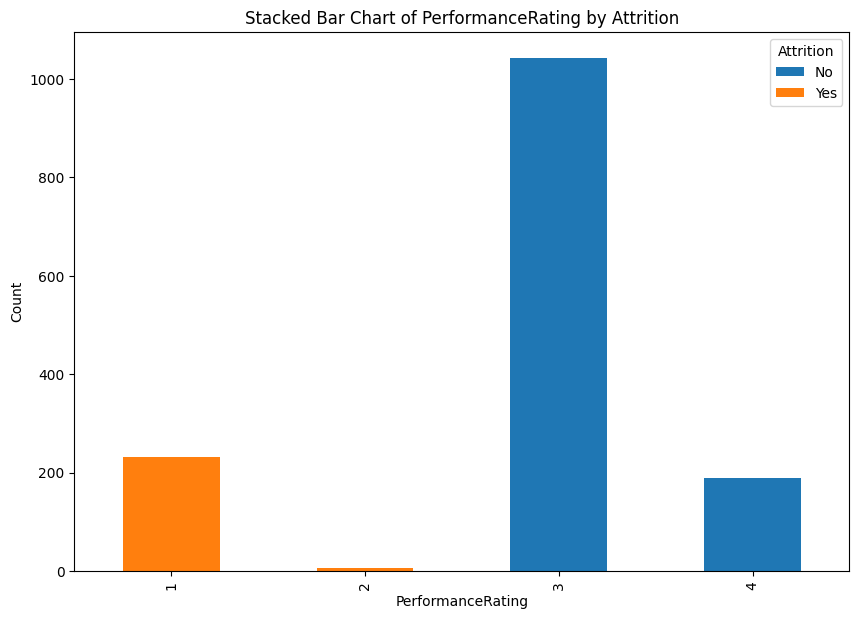

Chi-squared test for RelationshipSatisfaction: Chi2 = 5.24, P-value = 0.155


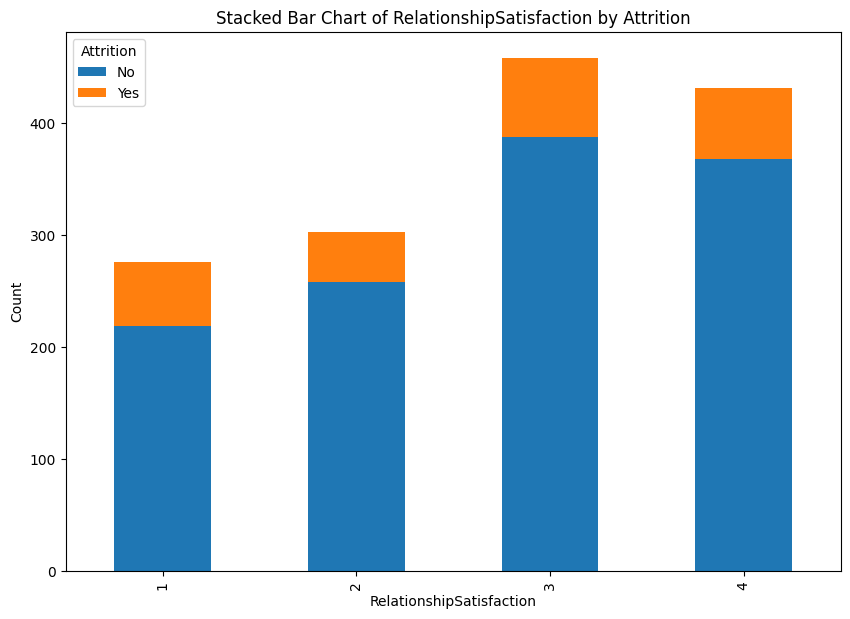

Chi-squared test for StockOptionLevel: Chi2 = 60.60, P-value = 0.000


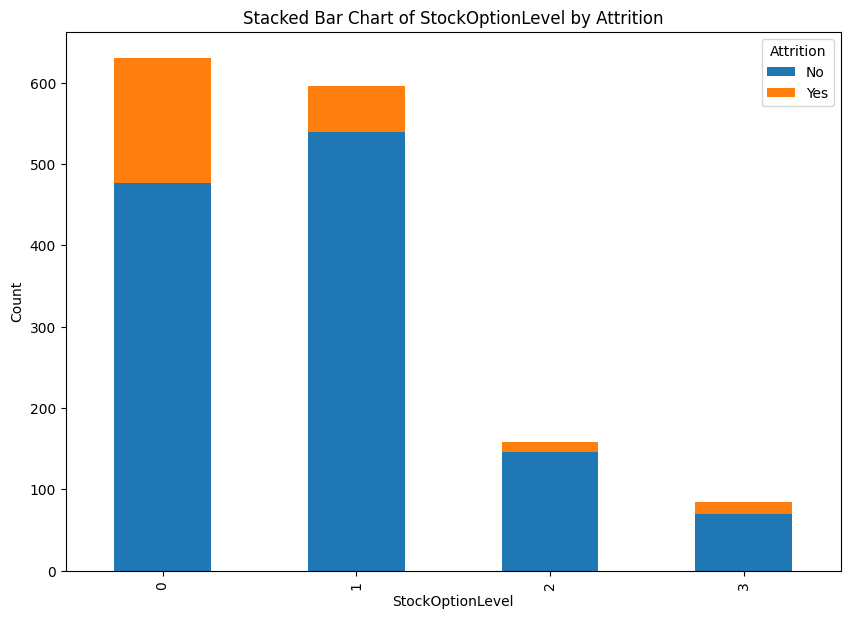

Chi-squared test for TrainingTimesLastYear: Chi2 = 15.15, P-value = 0.019


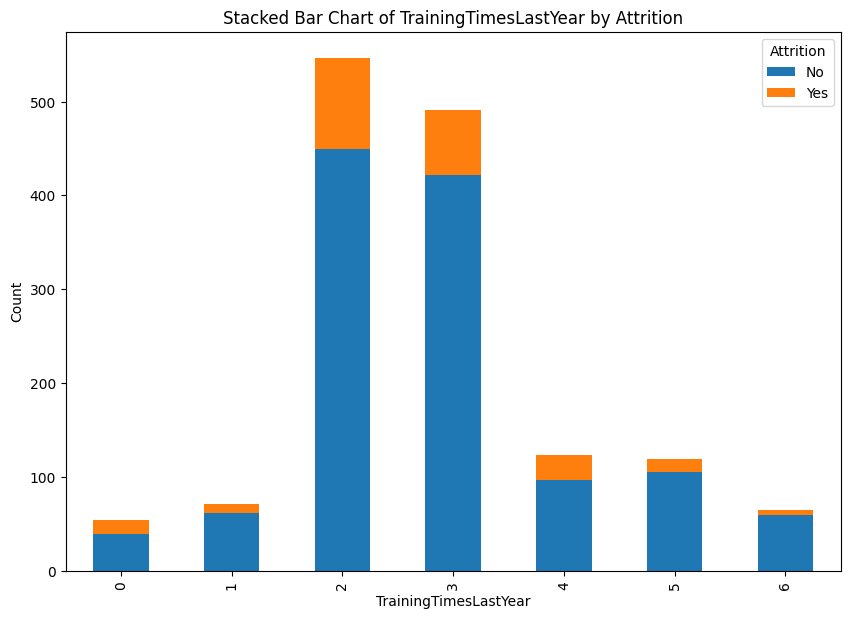

Chi-squared test for WorkLifeBalance: Chi2 = 1084.51, P-value = 0.000


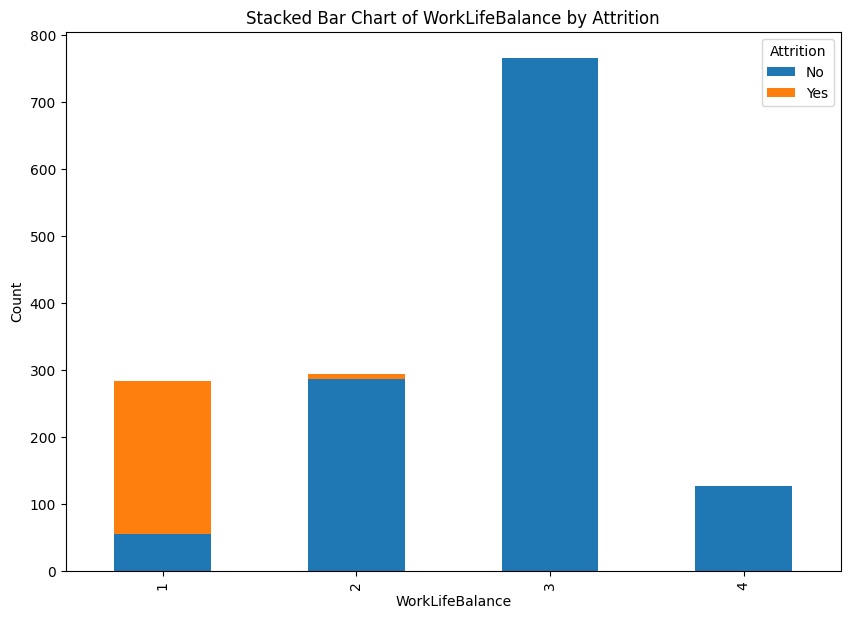

In [9]:
#multivariate analysis

#numerical variables
print("Analyzing Numerical Variables against Target:")
for col in numerical_cols:
    groups = [merged_df[col][merged_df['Attrition'] == category] for category in merged_df['Attrition'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {col}: F-statistic = {f_stat:.2f}, P-value = {p_value:.3f}")
    
    #Box plot visualization
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=col, data=merged_df)
    plt.title(f'Box Plot of {col} by Attrition')
    plt.show()

#categorical variables

categorical_cols = categorical_cols.drop('Attrition', axis=1)

print("\nAnalyzing Categorical Variables against Attrition:")
for col in categorical_cols:
    contingency_table = pd.crosstab(merged_df[col], merged_df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {col}: Chi2 = {chi2:.2f}, P-value = {p_value:.3f}")
    
    #Stacked bar chart visualization
    contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
    plt.title(f'Stacked Bar Chart of {col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [10]:
#Remove Features with a p-value greater than 0.05
#Add Features with a p-value less than 0.05
#Include only dailyRate not MonthlyIncome As well

new_features = ['Age', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'JobLevel',
               'JobSatisfaction', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany',
               'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel', 'Department',
               'EducationField', 'EnvironmentSatisfaction', 'Attrition']

new_df = merged_df[new_features]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   DailyRate                1470 non-null   int64 
 2   DistanceFromHome         1470 non-null   int64 
 3   JobInvolvement           1470 non-null   object
 4   JobLevel                 1470 non-null   object
 5   JobSatisfaction          1470 non-null   object
 6   PerformanceRating        1470 non-null   object
 7   TotalWorkingYears        1470 non-null   int64 
 8   YearsAtCompany           1470 non-null   int64 
 9   YearsInCurrentRole       1470 non-null   int64 
 10  YearsWithCurrManager     1470 non-null   int64 
 11  BusinessTravel           1470 non-null   object
 12  Department               1470 non-null   object
 13  EducationField           1470 non-null   object
 14  EnvironmentSatisfaction  1470 non-null  

In [11]:
#encode categorical columns
new_encoded_df = pd.get_dummies(new_df, columns=['BusinessTravel','Department', 'EducationField', 
                                                ], dtype=int)
print(new_encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   DailyRate                          1470 non-null   int64 
 2   DistanceFromHome                   1470 non-null   int64 
 3   JobInvolvement                     1470 non-null   object
 4   JobLevel                           1470 non-null   object
 5   JobSatisfaction                    1470 non-null   object
 6   PerformanceRating                  1470 non-null   object
 7   TotalWorkingYears                  1470 non-null   int64 
 8   YearsAtCompany                     1470 non-null   int64 
 9   YearsInCurrentRole                 1470 non-null   int64 
 10  YearsWithCurrManager               1470 non-null   int64 
 11  EnvironmentSatisfaction            1470 non-null   object
 12  Attrit

Spearman's correlation between PerformanceRating and JobSatisfaction: 0.3696013911205866

Contingency Table:
JobSatisfaction      1    2    3    4
PerformanceRating                    
1                  170   45    9    7
2                    5    1    0    0
3                  191  199  319  335
4                   32   35   50   72


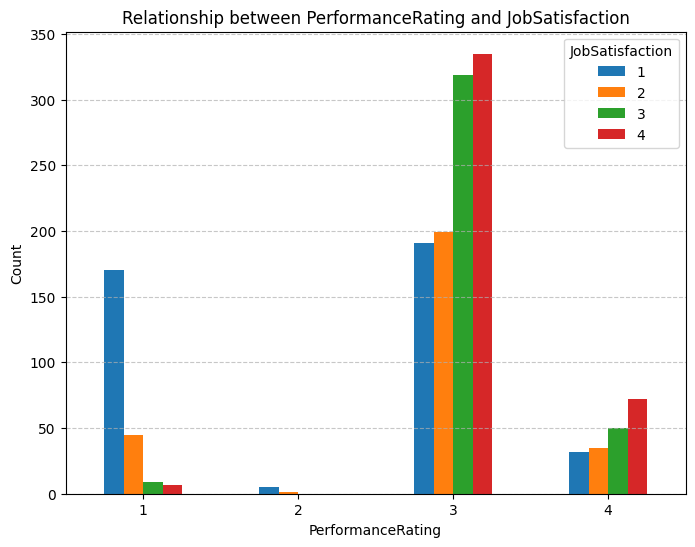

In [12]:
spearman_corr = new_encoded_df['PerformanceRating'].corr(new_encoded_df['JobSatisfaction'], method='spearman')
print(f"Spearman's correlation between PerformanceRating and JobSatisfaction: {spearman_corr}")

contingency_table = pd.crosstab(new_encoded_df['PerformanceRating'], new_encoded_df['JobSatisfaction'])
print("\nContingency Table:")
print(contingency_table)



    # Plotting a grouped bar chart
contingency_table.plot(kind='bar', figsize=(8, 6))
plt.title('Relationship between PerformanceRating and JobSatisfaction')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='JobSatisfaction')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
#Create logistic regression model with new features

#train/split data for model
x = new_encoded_df.drop('Attrition', axis=1)
y = new_encoded_df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)

Text(0.5, 23.52222222222222, 'Predicted label')

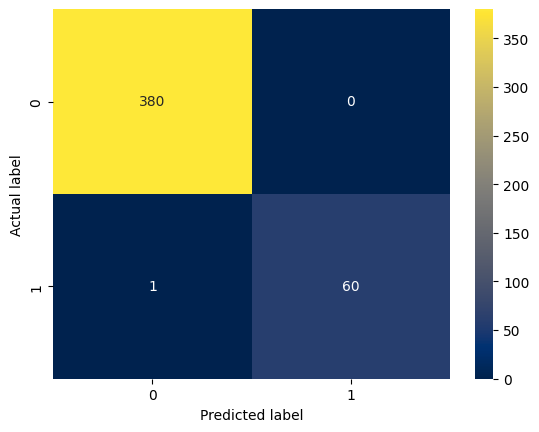

In [14]:
#confusion matrix

confus_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confus_matrix), annot=True, cmap='cividis', fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
#accuracy, precision, recall

target_names = ['No Attrition', 'Attrition']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

No Attrition       1.00      1.00      1.00       380
   Attrition       1.00      0.98      0.99        61

    accuracy                           1.00       441
   macro avg       1.00      0.99      1.00       441
weighted avg       1.00      1.00      1.00       441



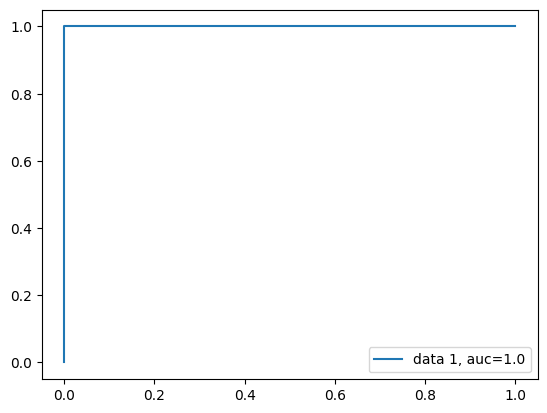

In [16]:
#ROC curve

encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

y_pred_proba = log_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_encoded, y_pred_proba)
auc = metrics.roc_auc_score(y_test_encoded, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

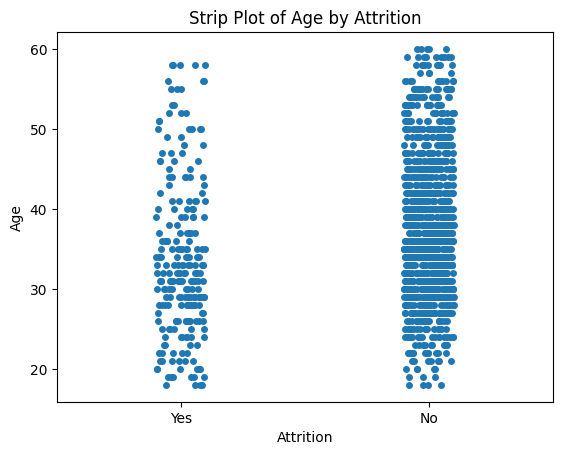

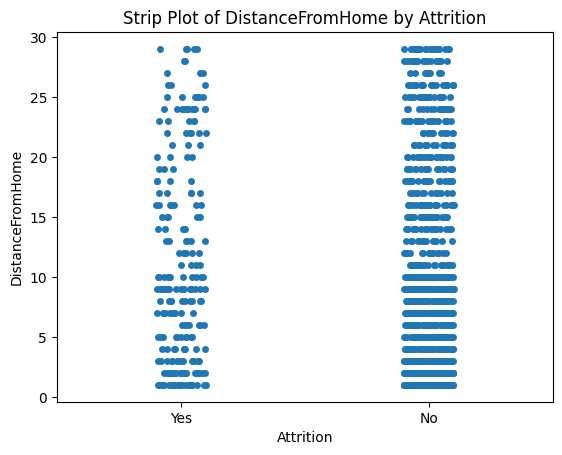

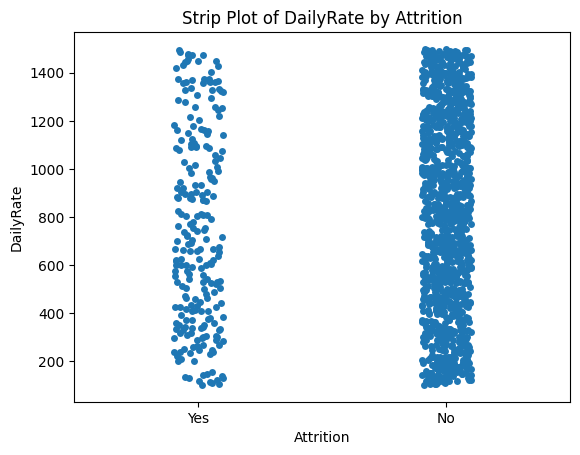

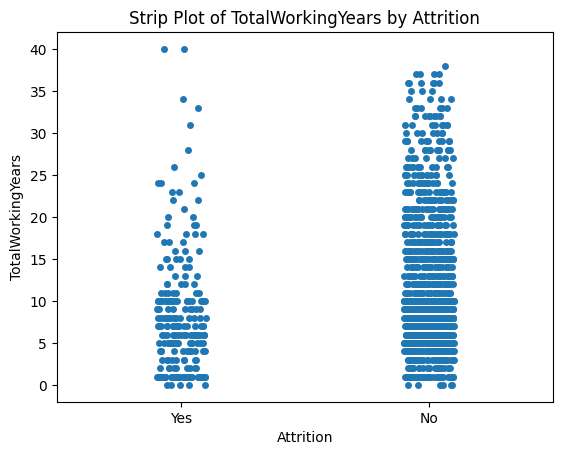

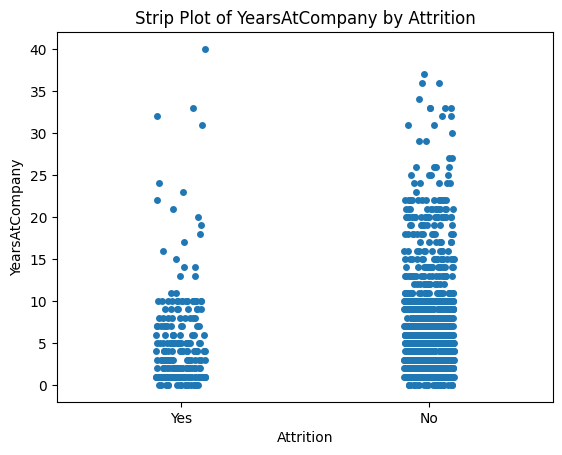

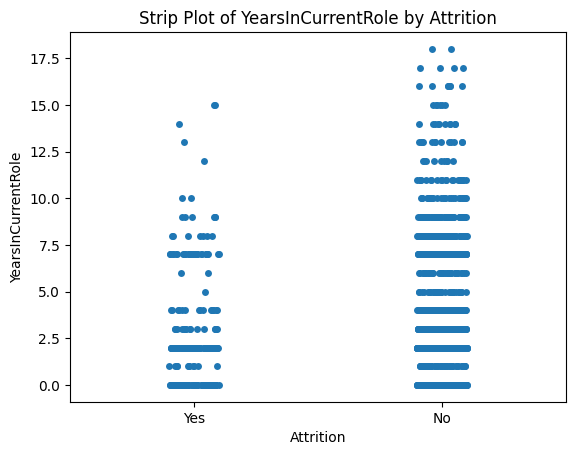

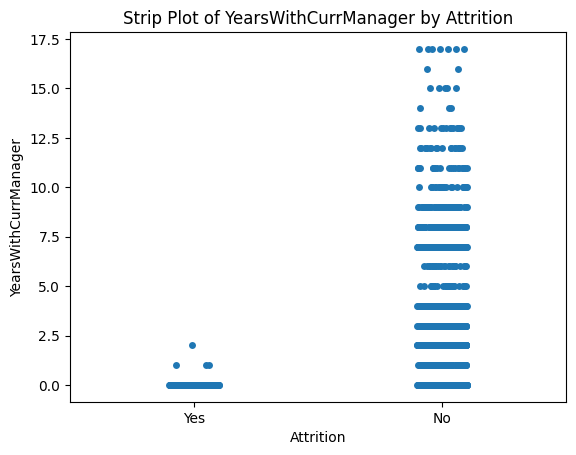

In [17]:
# Stripplot Age
sns.stripplot(x='Attrition', y='Age', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# Stripplot DistanceFromHome
sns.stripplot(x='Attrition', y='DistanceFromHome', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of DistanceFromHome by Attrition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

# Stripplot DailyRate
sns.stripplot(x='Attrition', y='DailyRate', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of DailyRate by Attrition')
plt.xlabel('Attrition')
plt.ylabel('DailyRate')
plt.show()

# Stripplot TotalWorkingYears
sns.stripplot(x='Attrition', y='TotalWorkingYears', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of TotalWorkingYears by Attrition')
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.show()

# Stripplot YearsAtCompany
sns.stripplot(x='Attrition', y='YearsAtCompany', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of YearsAtCompany by Attrition')
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.show()

# Stripplot YearsInCurrentRole
sns.stripplot(x='Attrition', y='YearsInCurrentRole', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of YearsInCurrentRole by Attrition')
plt.xlabel('Attrition')
plt.ylabel('YearsInCurrentRole')
plt.show()

# Stripplot YearsWithCurrManager
sns.stripplot(x='Attrition', y='YearsWithCurrManager', data=new_encoded_df, jitter=True)
plt.title('Strip Plot of YearsWithCurrManager by Attrition')
plt.xlabel('Attrition')
plt.ylabel('YearsWithCurrManager')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Random forest model

x = new_encoded_df.drop('Attrition', axis=1) 
y = new_encoded_df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train)

y_pred = forest_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


C:\Users\Hayden\AppData\Local\Temp\ipykernel_3792\1627085320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='cividis')


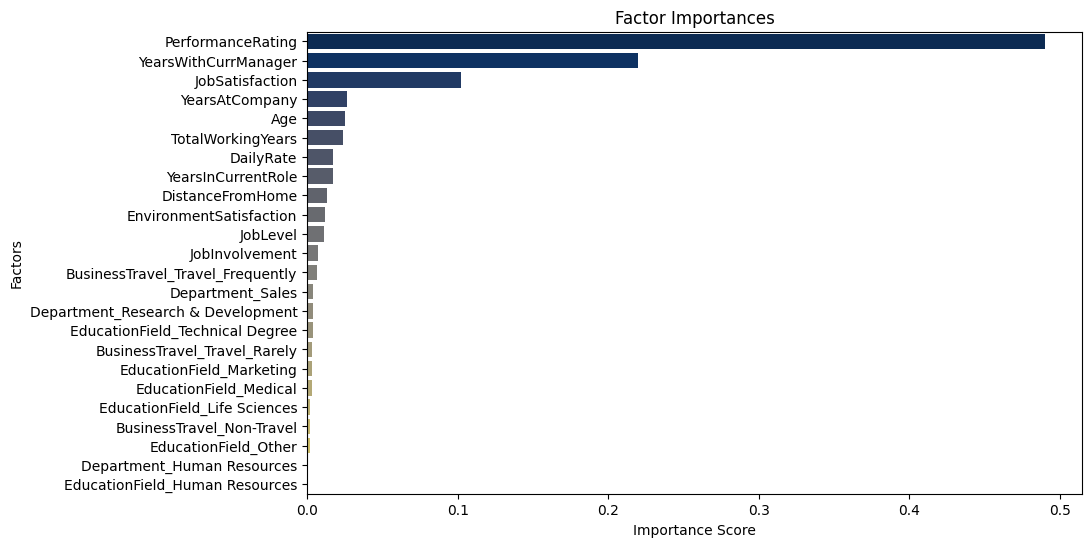

In [19]:
features = new_encoded_df.columns.drop('Attrition')

importances = forest_model.feature_importances_

feature_importance_series = pd.Series(data=importances, index=features)

# Sort in descending order
sorted_importance = feature_importance_series.sort_values(ascending=False)

 # Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='cividis')
plt.title('Factor Importances')
plt.xlabel('Importance Score')
plt.ylabel('Factors')
plt.show()

Text(0.5, 23.52222222222222, 'Predicted label')

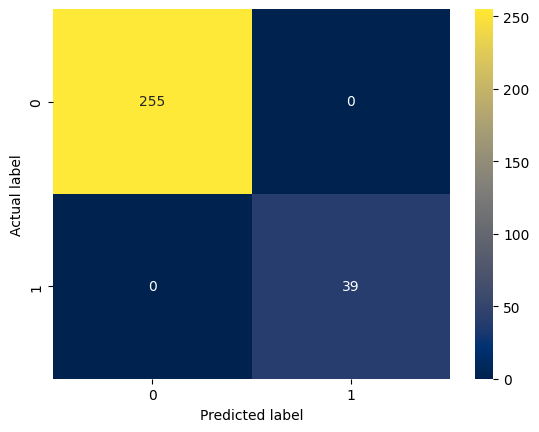

In [20]:
#confusion matrix for random forest model

confus_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confus_matrix), annot=True, cmap='cividis', fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
 #accuracy, precision, recall

target_names = ['No Attrition', 'Attrition']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

No Attrition       1.00      1.00      1.00       255
   Attrition       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



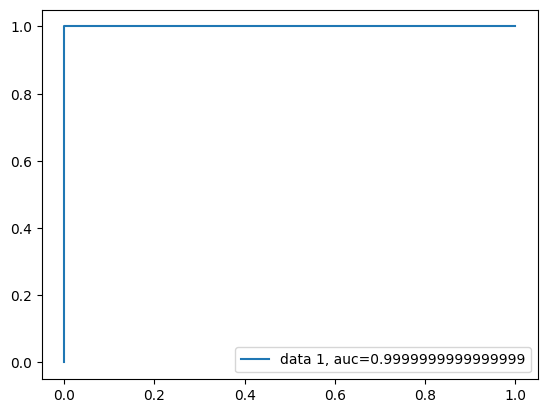

In [22]:
#ROC curve

encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

y_pred_proba = forest_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_encoded, y_pred_proba)
auc = metrics.roc_auc_score(y_test_encoded, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

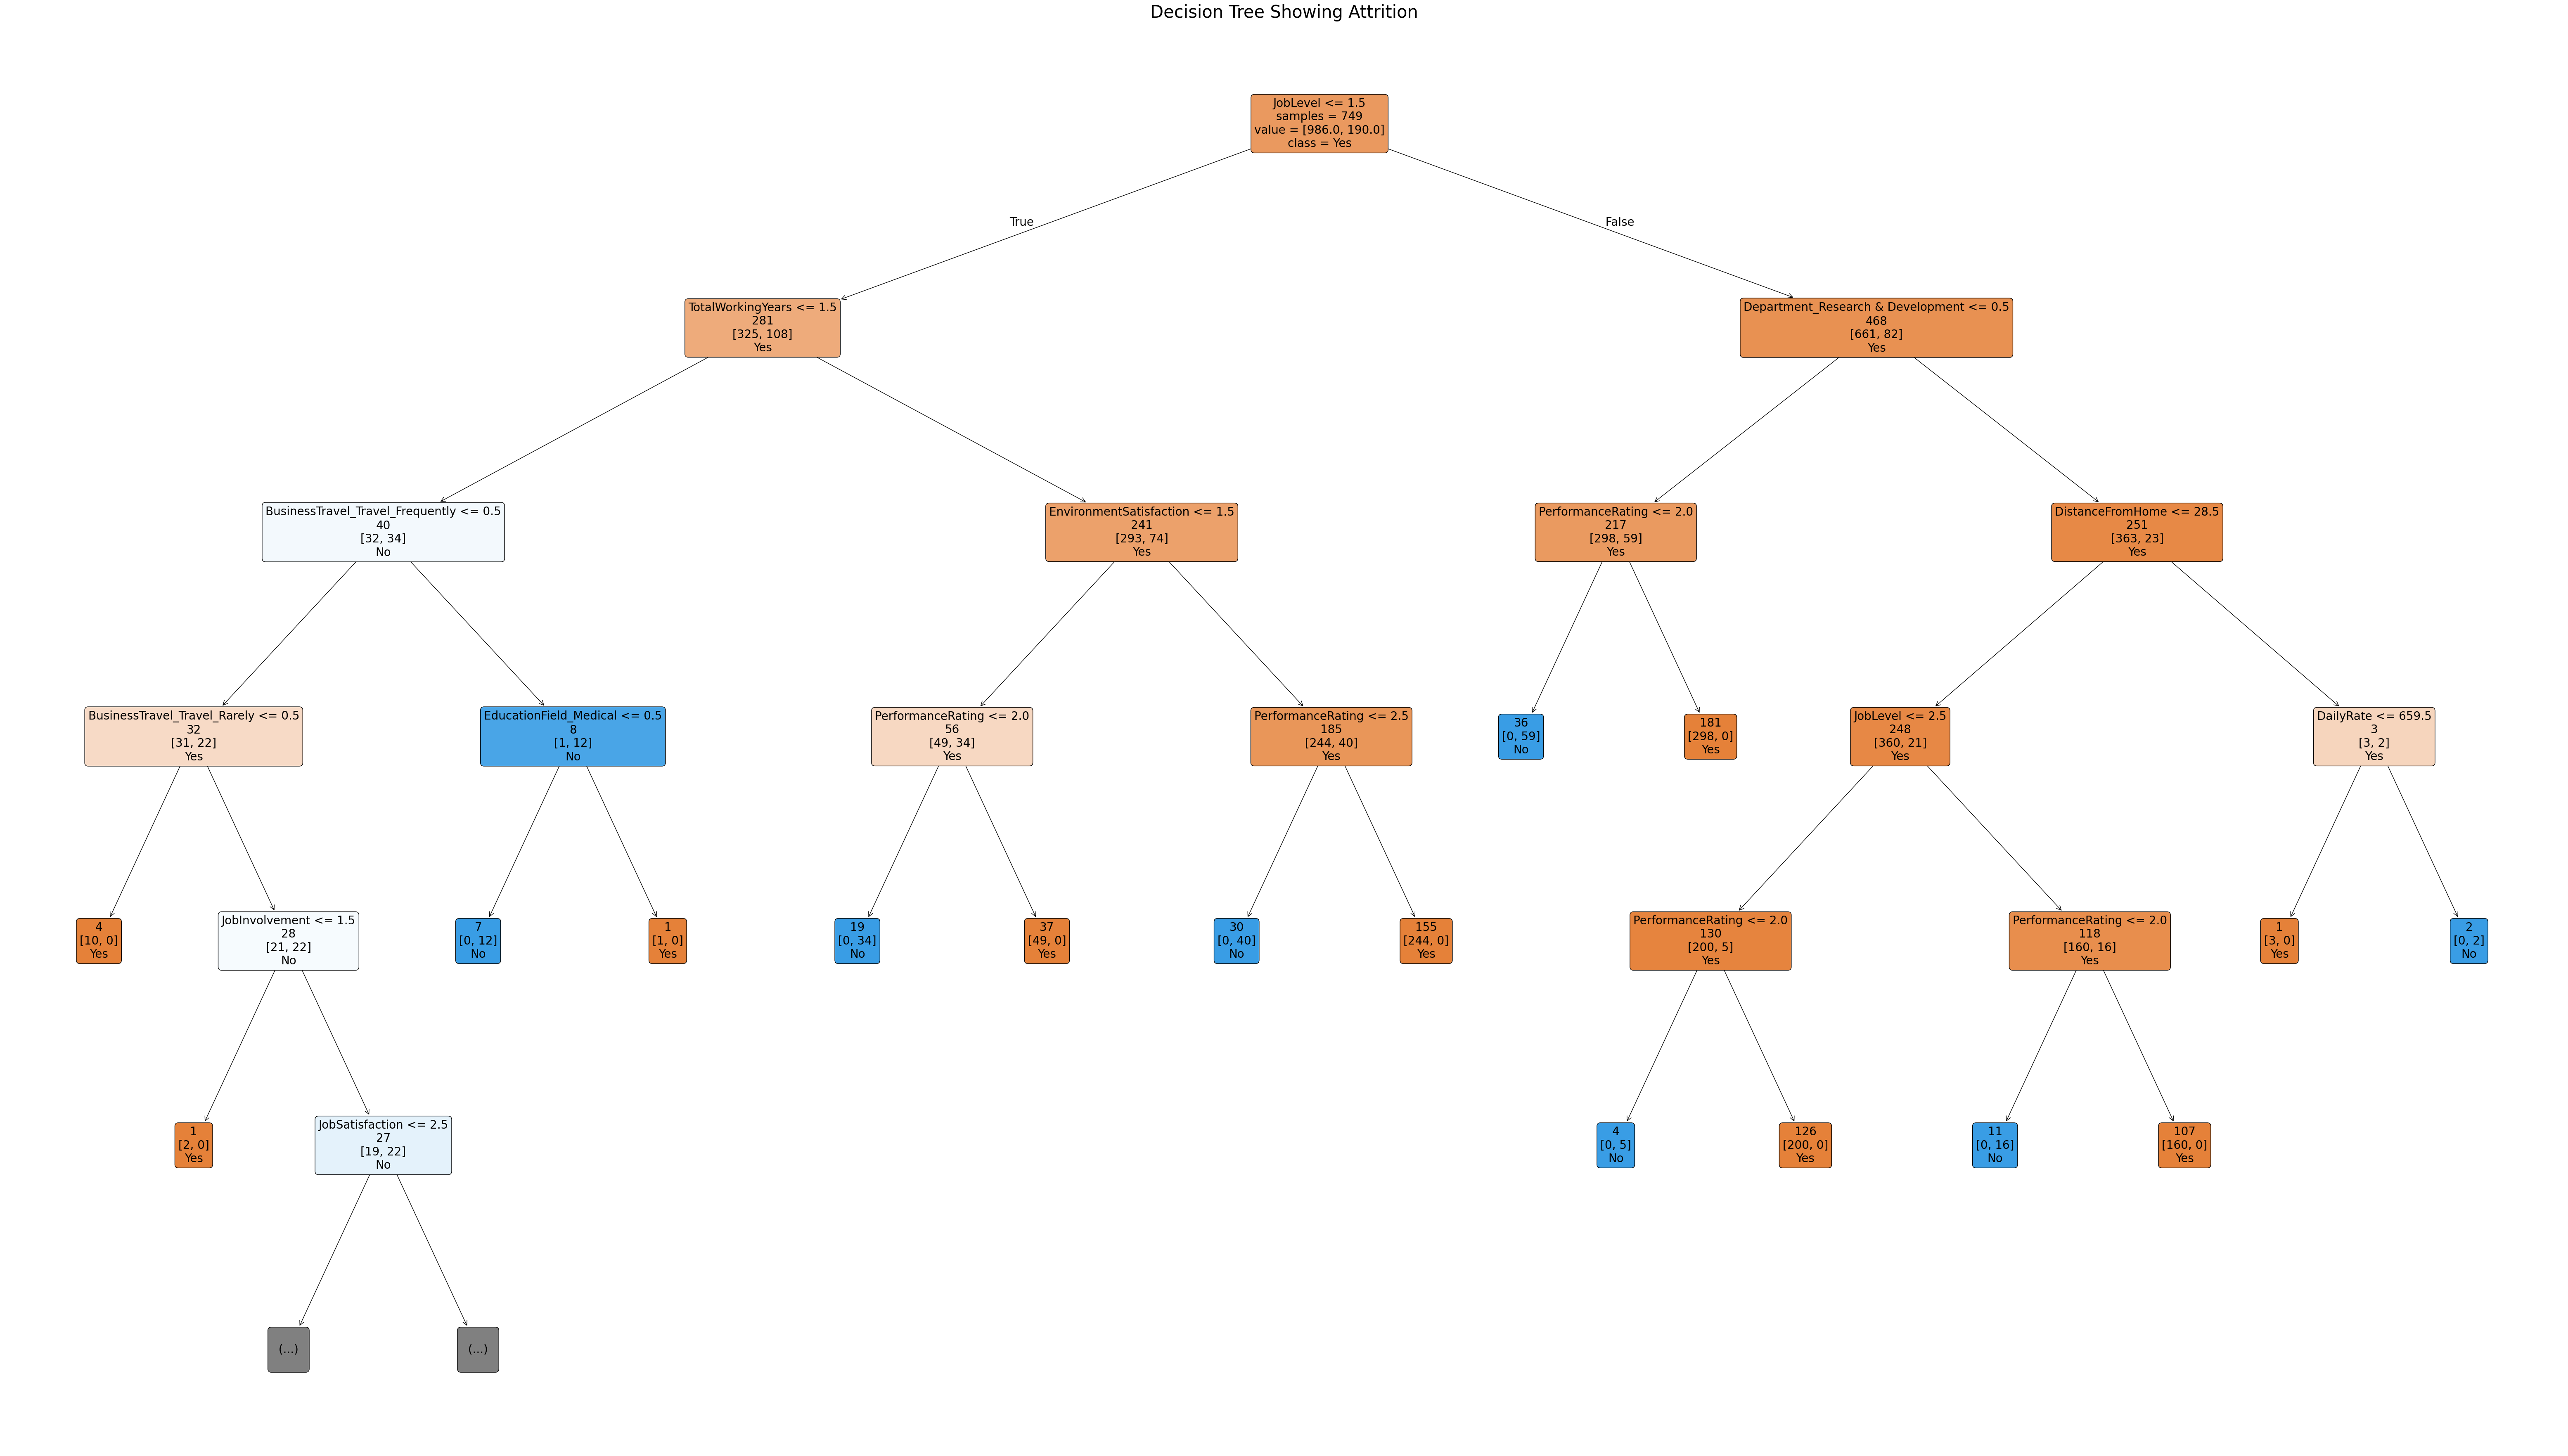

In [23]:
#visualize tree
from sklearn.tree import plot_tree

single_tree = forest_model.estimators_[0]
features = new_encoded_df.columns.drop('Attrition')
target = new_encoded_df['Attrition']

plt.figure(figsize=(80, 45))
plot_tree(single_tree,
          max_depth=5,
          feature_names=features,
          class_names=target,
          label='root',
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=20)
plt.title("Decision Tree Showing Attrition", fontsize=30)
plt.show()